# What did the Fed think during the 2008 financial crisis: preliminary NLP with meeting transcripts


### Context
This is an attempt to run a preliminary NLP analysis on the meeting transcripts of the Federal Open Market Committee during the months leading up to the 2008 financial crisis. Did the Fed think that they had the situation under control? text:

In [17]:
! pip install PyPDF2

   ---------------------------------------- 0.0/232.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/232.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 232.6/232.6 kB 3.6 MB/s eta 0:00:00


In [19]:
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# Step 1: Fetch the PDF directly from arXiv
url = "https://arxiv.org/pdf/2212.08073.pdf"
response = requests.get(url)

# Check if the response is a PDF
if response.headers['Content-Type'] == 'application/pdf':
    pdf_file = BytesIO(response.content)
    
    # Step 2: Read the PDF content
    reader = PdfReader(pdf_file)
    document_text = ""
    for page in reader.pages:
        document_text += page.extract_text()
    
    # Display the first 500 characters to verify content
    print(document_text[:500])
else:
    print("Failed to download PDF. Received content type:", response.headers['Content-Type'])


Constitutional AI: Harmlessness from AI Feedback
Yuntao Bai, Saurav Kadavath, Sandipan Kundu, Amanda Askell, Jackson Kernion,
Andy Jones, Anna Chen, Anna Goldie, Azalia Mirhoseini, Cameron McKinnon,
Carol Chen, Catherine Olsson, Christopher Olah, Danny Hernandez, Dawn Drain,
Deep Ganguli, Dustin Li, Eli Tran-Johnson, Ethan Perez, Jamie Kerr, Jared Mueller,
Jeffrey Ladish, Joshua Landau, Kamal Ndousse, Kamile Lukosuite, Liane Lovitt,
Michael Sellitto, Nelson Elhage, Nicholas Schiefer, Noemi Merc


## Text extraction

Links to documents used: Jan 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf Mar 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf July 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf Sept 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf Oct 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf



In [100]:
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# Dictionary of URLs with dates as keys for easy identification
pdf_urls = {
    "Jan_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf",
    "Mar_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf",
    "July_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf",
    "Sept_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf",
    "Oct_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf"
}

# Function to download and extract text from PDFs
def extract_texts_to_dict(url_dict):
    all_texts = {}  # Dictionary to store all extracted texts

    for date, url in url_dict.items():
        response = requests.get(url)
        
        # Check if the response is a PDF
        if response.headers['Content-Type'] == 'application/pdf':
            pdf_file = BytesIO(response.content)
            reader = PdfReader(pdf_file)
            document_text = ""
            
            # Extract text from each page
            for page in reader.pages:
                text = page.extract_text()
                if text:  # Ensure text extraction succeeded for each page
                    document_text += text
            
            # Store extracted text in the dictionary with the date as the key
            all_texts[date] = document_text
            print(f"Text for {date} has been extracted and stored in memory.")
        
        else:
            print(f"Failed to download PDF from {url}. Received content type:", response.headers['Content-Type'])
    
    return all_texts

# Execute extraction and store texts in the dictionary
speeches_text = extract_texts_to_dict(pdf_urls)

# Display the beginning of each document's text to verify extraction
for date, text in speeches_text.items():
    print(f"\n--- First 500 characters of the {date} speech ---")
    print(text[:500])


Text for Jan_2008 has been extracted and stored in memory.
Text for Mar_2008 has been extracted and stored in memory.
Text for July_2008 has been extracted and stored in memory.
Text for Sept_2008 has been extracted and stored in memory.
Text for Oct_2008 has been extracted and stored in memory.

--- First 500 characters of the Jan_2008 speech ---
Conference Call  of the Federal Open Market Committee on 
January 21, 2008 
 
A conference call of the Federal Open Market Committee was held on  Monday, January 
21, 2008, at 6:00 p.m.  Those present were the following: 
 
Mr. Bernanke, Chairman Mr. Geithner, Vic e Chairman  
Mr. Evans Mr. Hoenig Mr. Kohn Mr. Kroszner Mr. Poole Mr. Rosengren Mr. Warsh  
 Mr. Fisher, Ms. Pianalto, and Messrs. Plosser and Stern, Alternate Members of the Federal Open Market Committee  
 Messrs. Lacker and Lockhart

--- First 500 characters of the Mar_2008 speech ---
Conference Call  of the Federal Open Market Committee on 
March 10 , 2008 
 
A conference call o

## Word frequency analysis of each of the calls



Analyzing Jan_2008 speech...


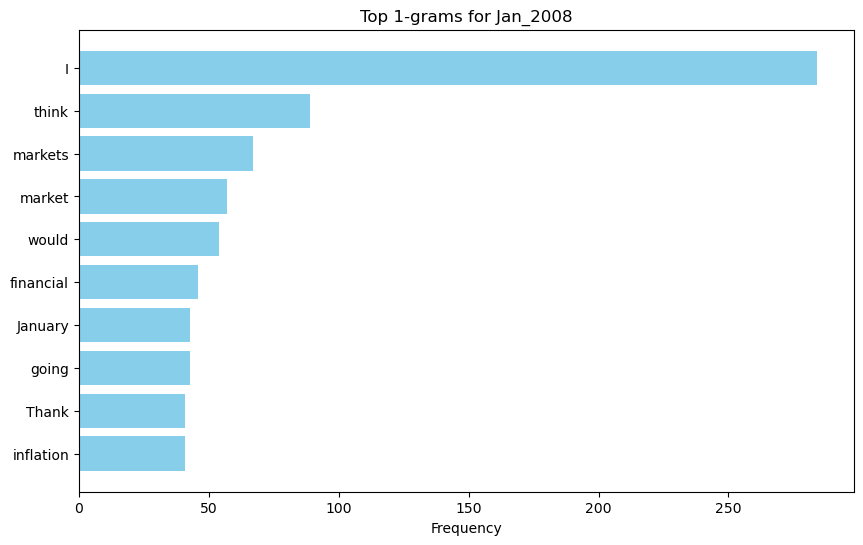

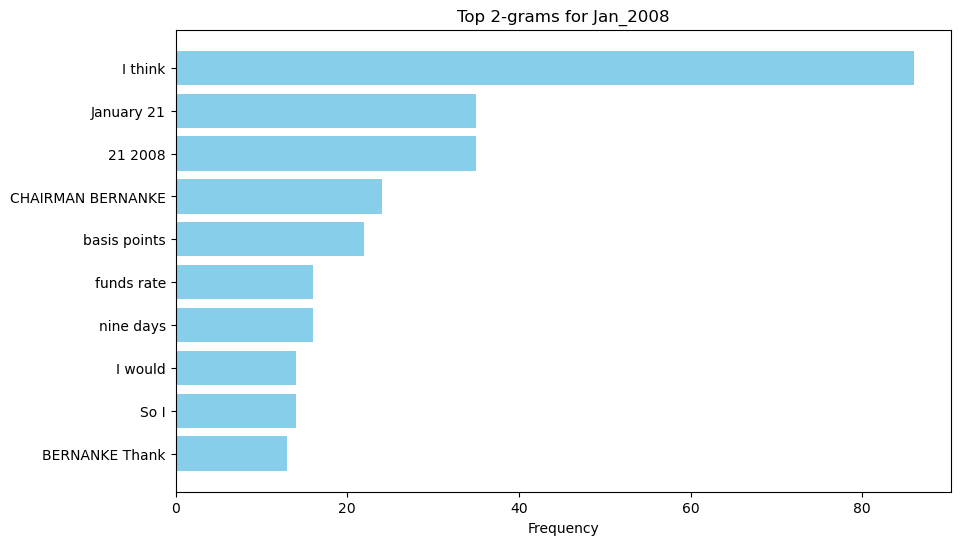

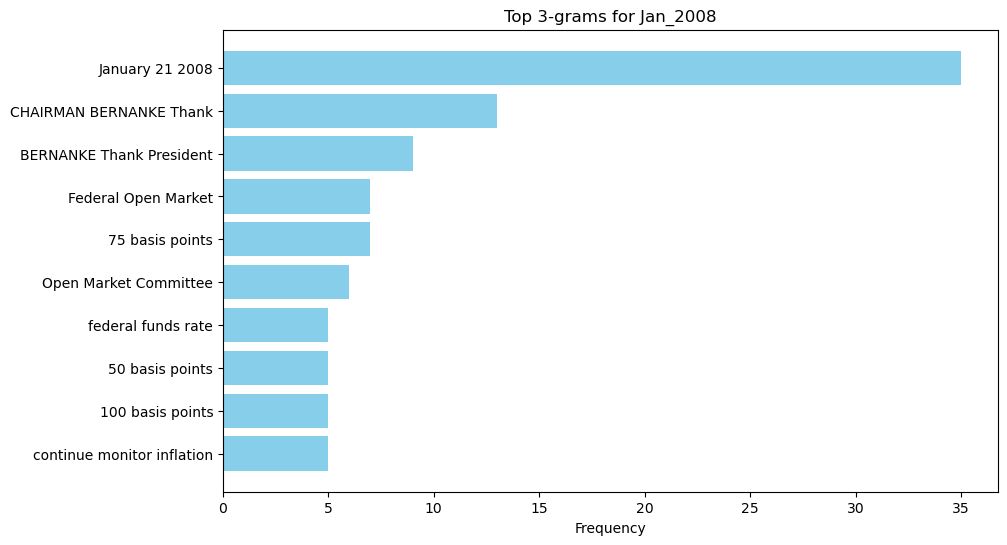

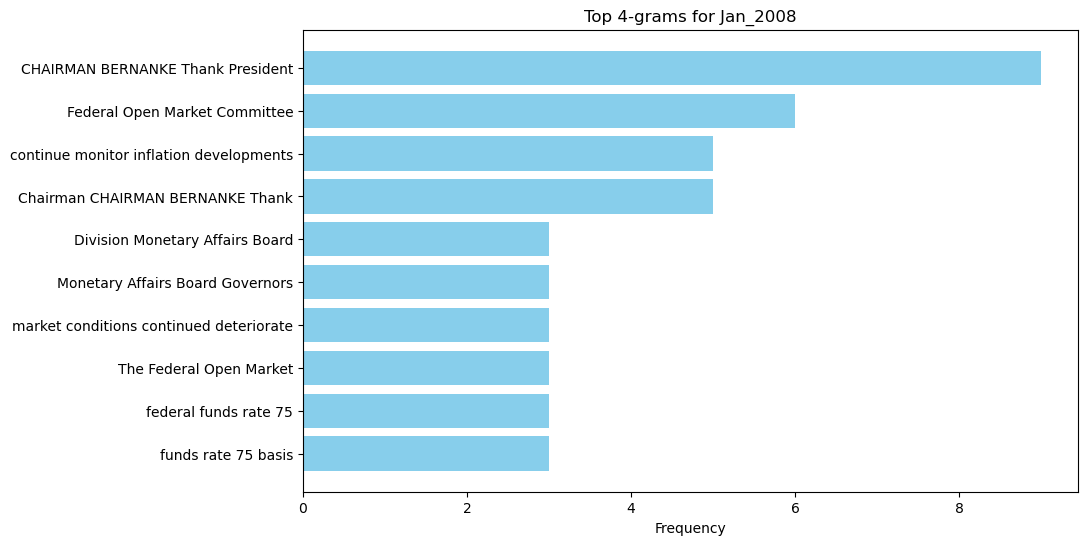

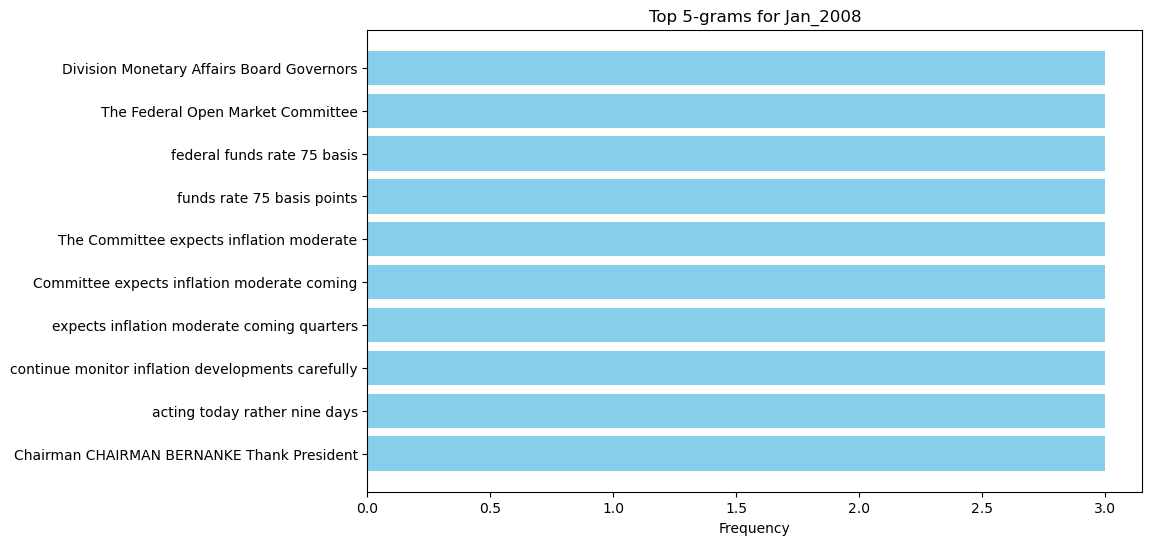


Analyzing Mar_2008 speech...


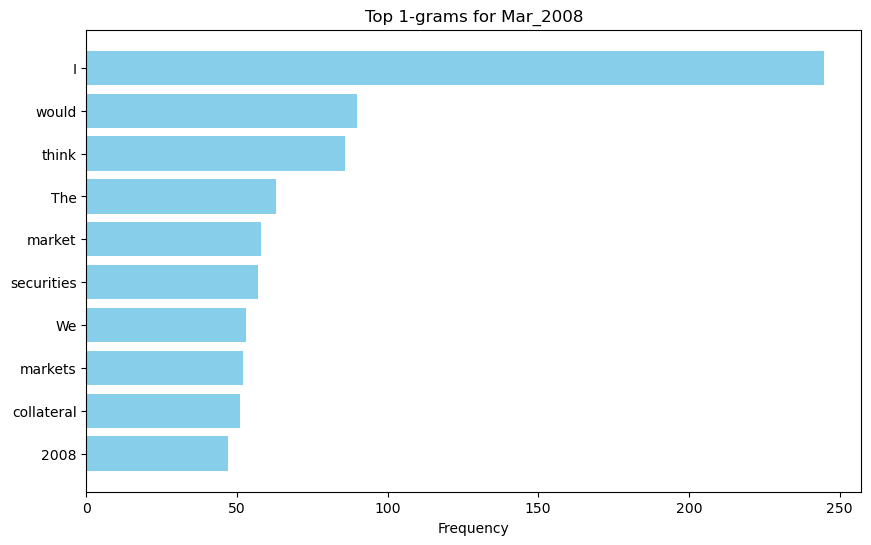

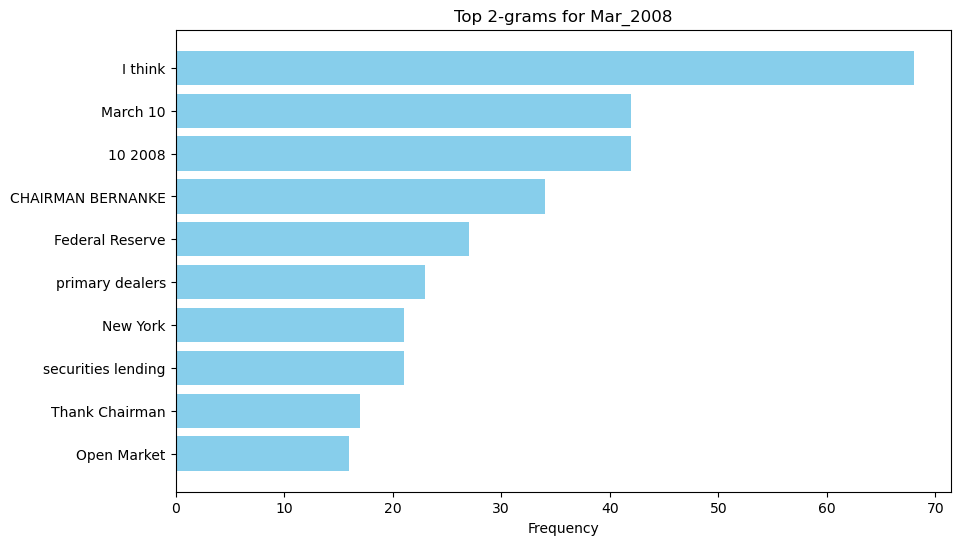

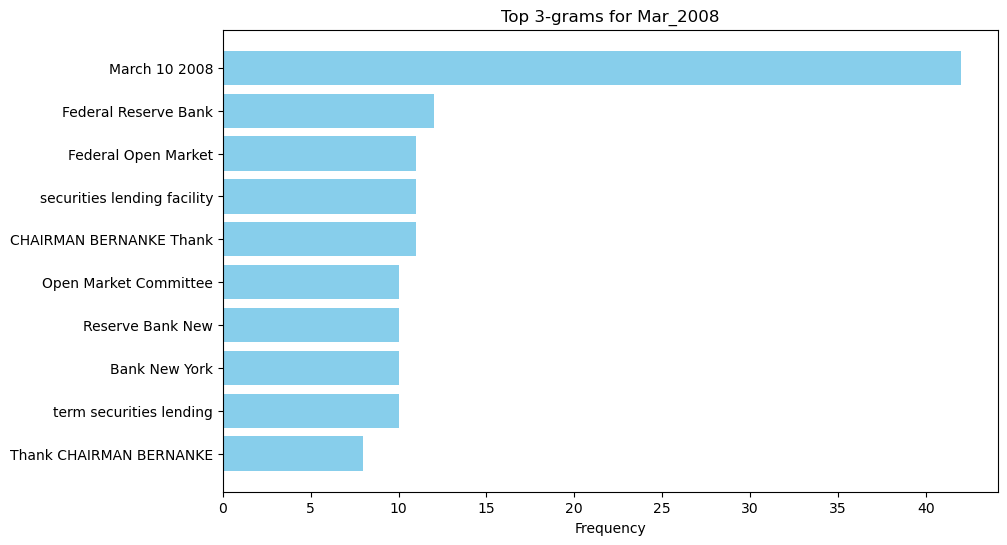

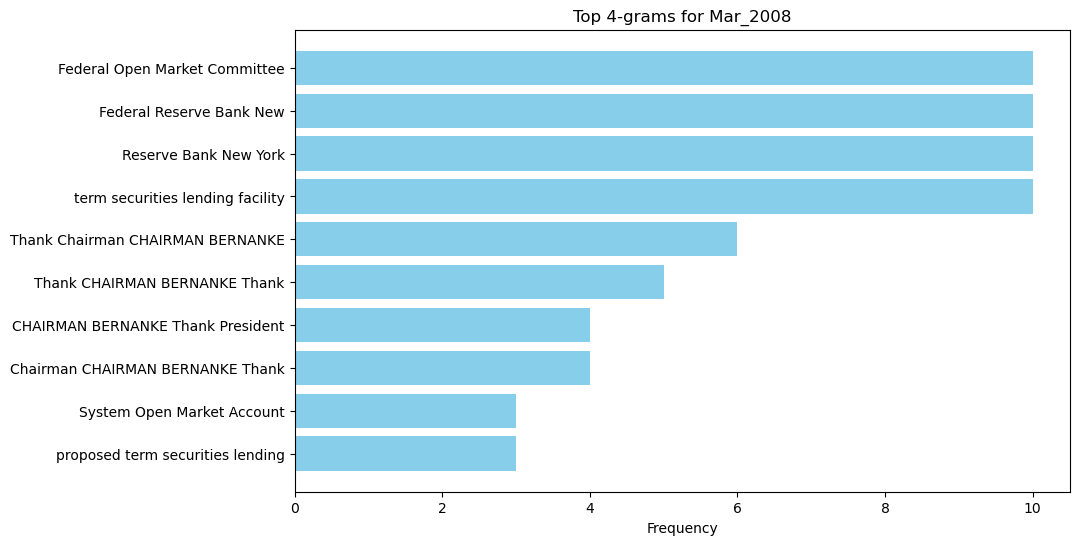

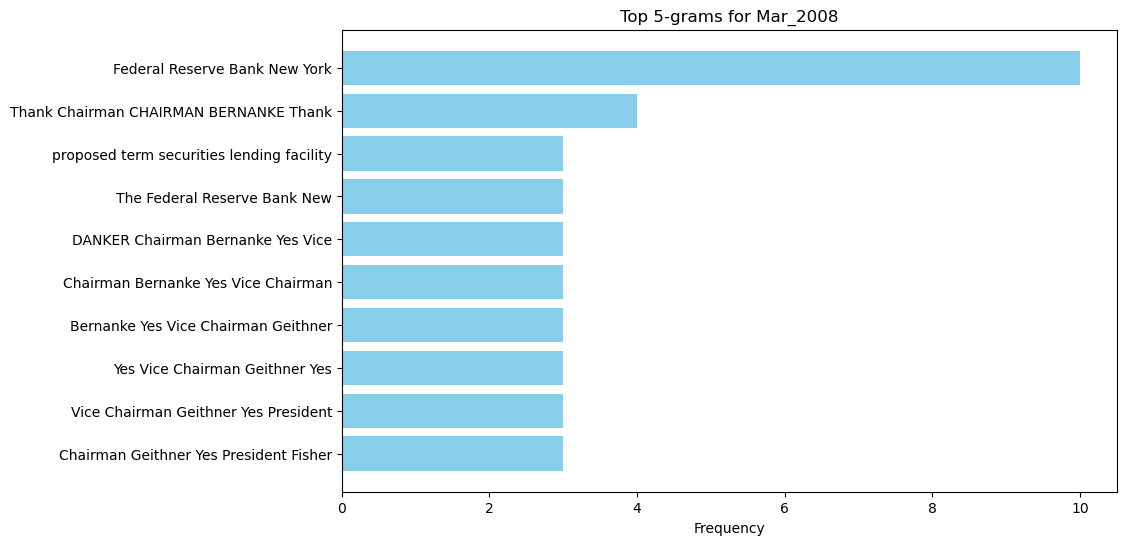


Analyzing July_2008 speech...


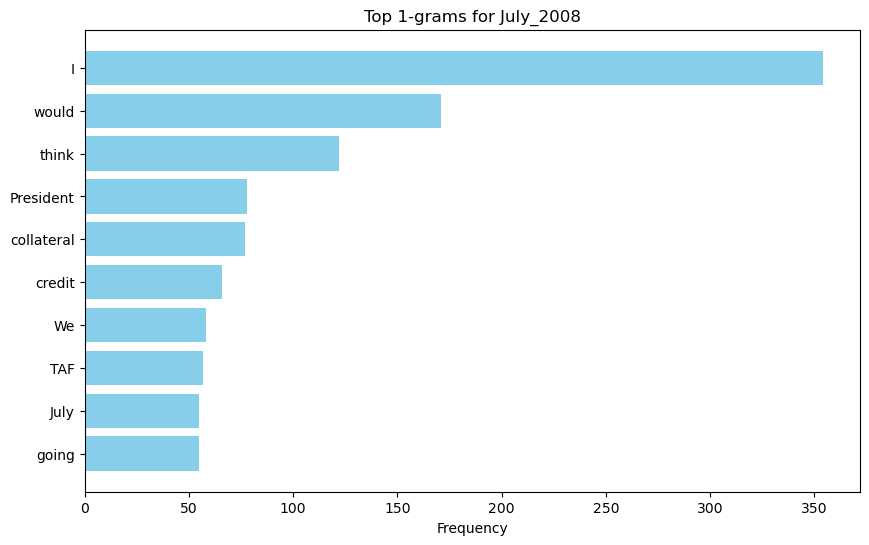

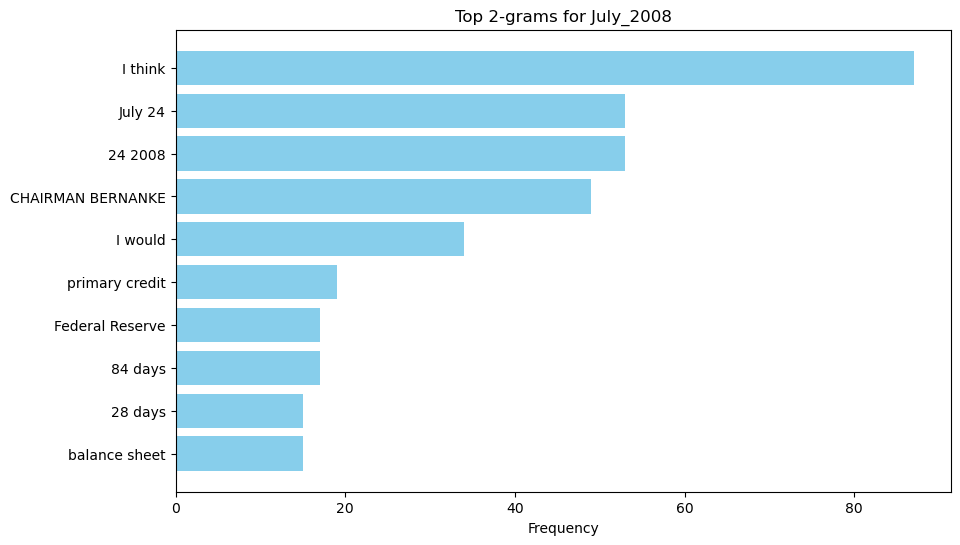

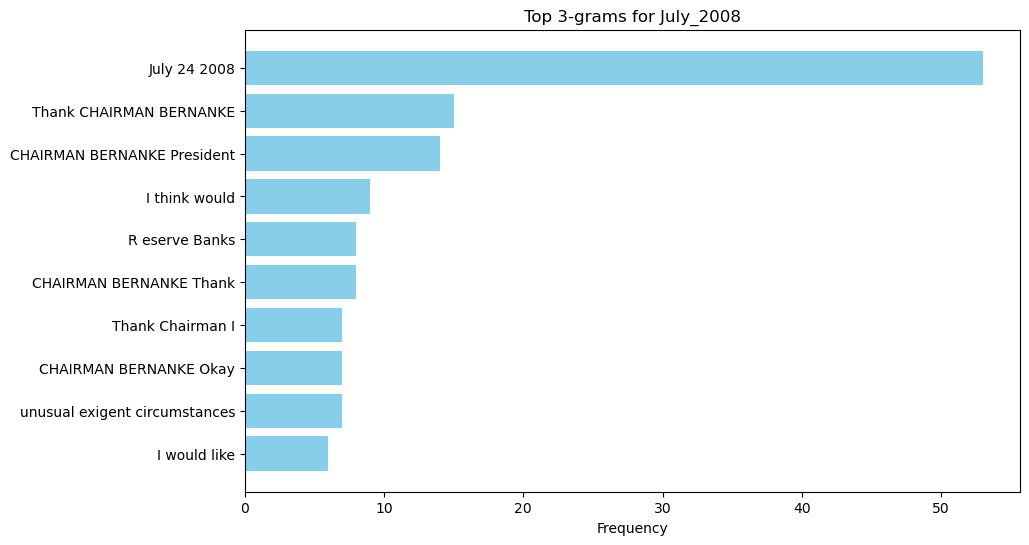

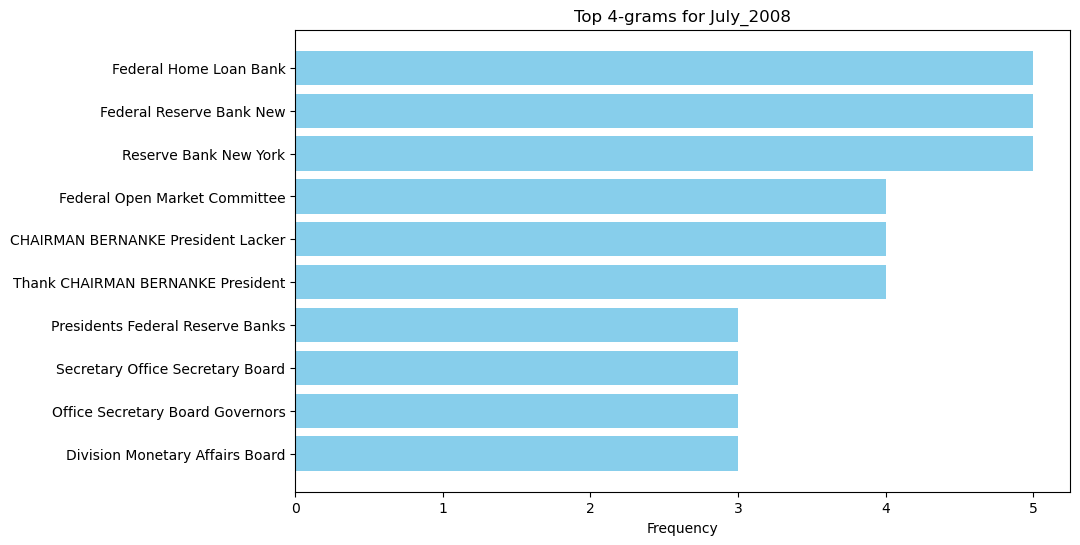

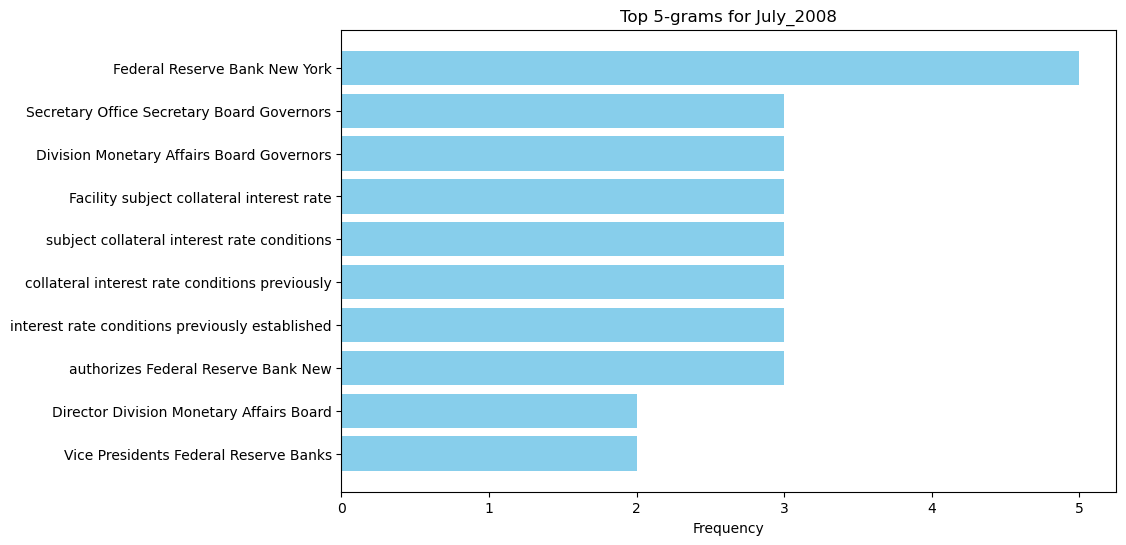


Analyzing Sept_2008 speech...


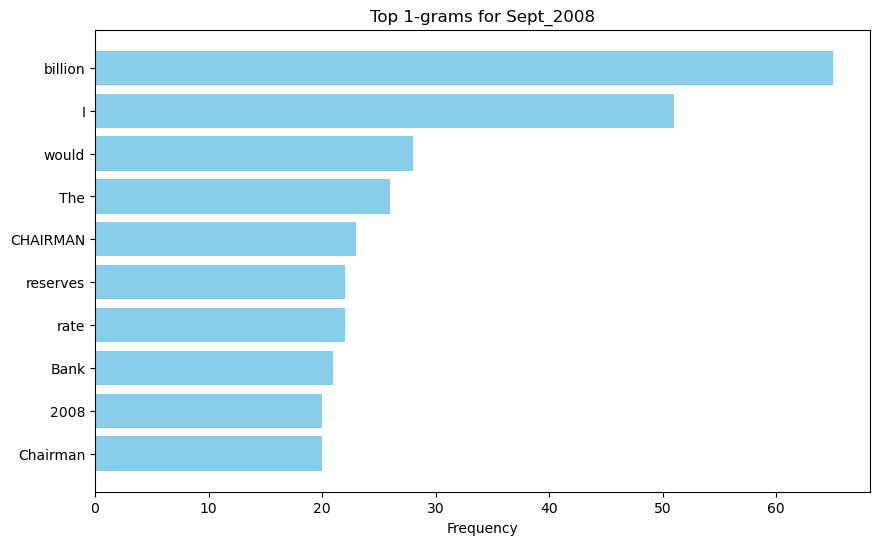

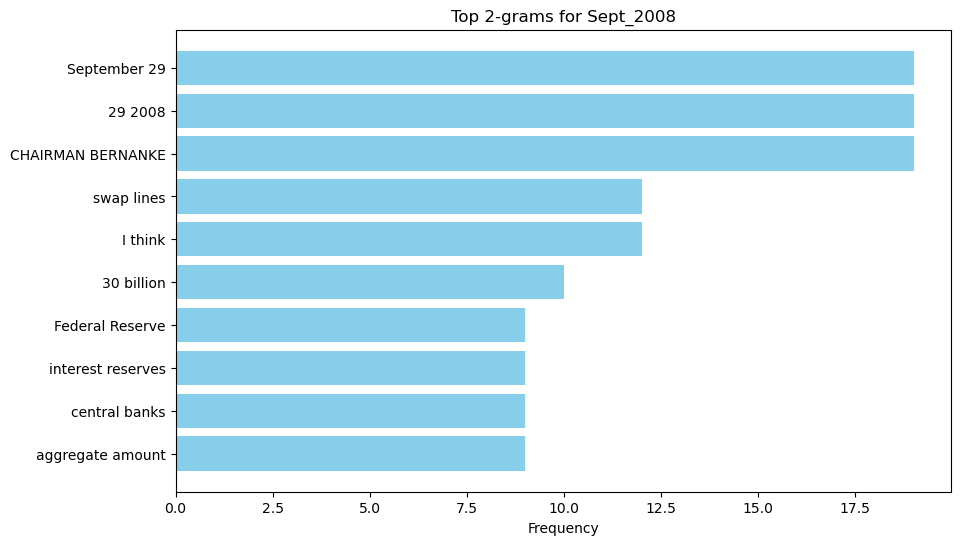

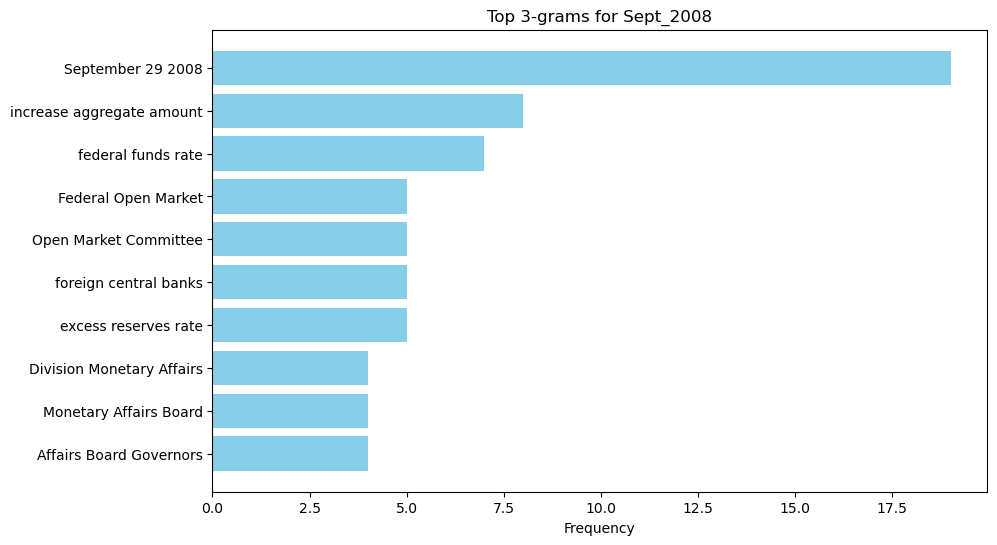

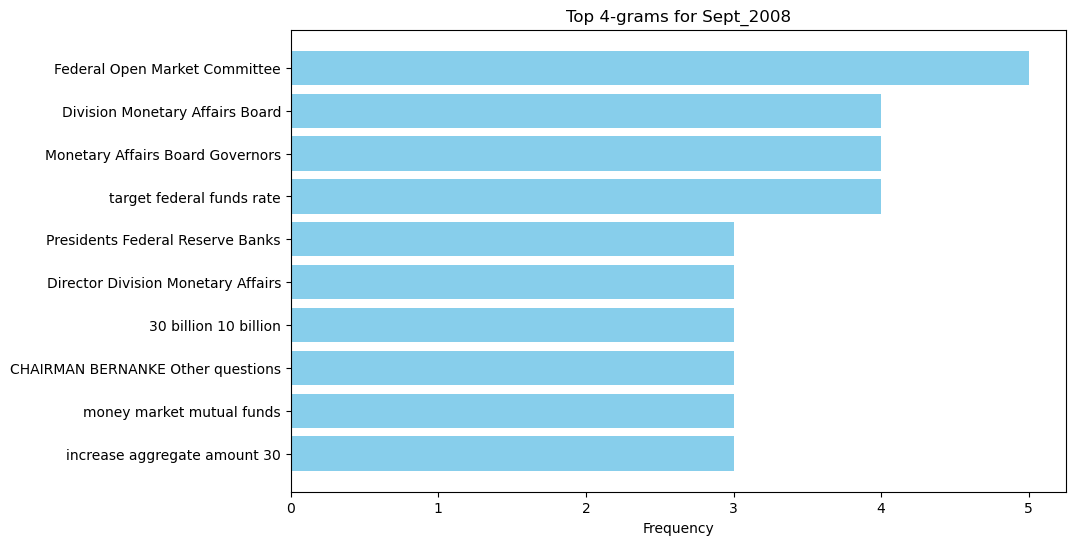

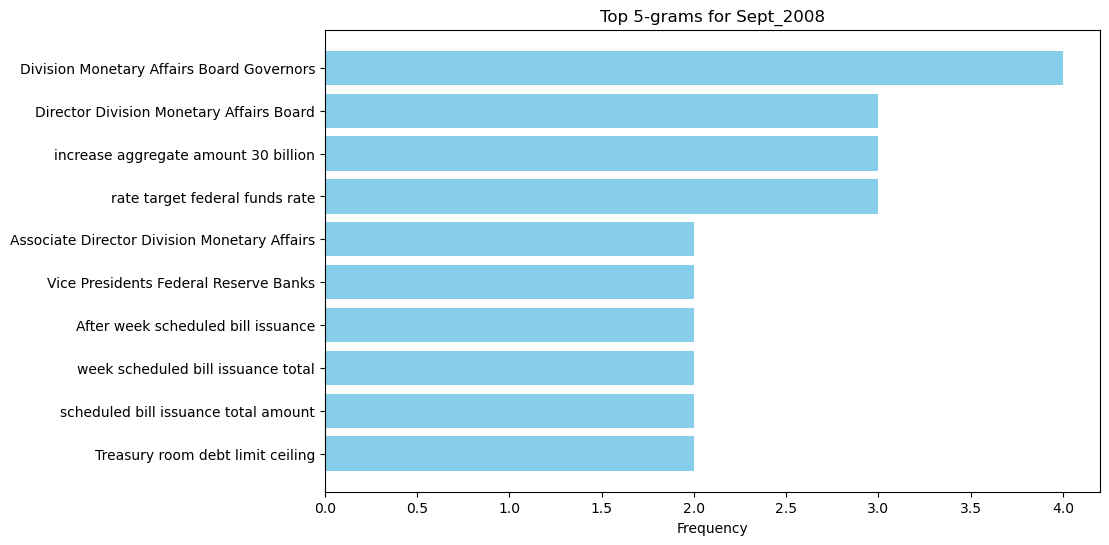


Analyzing Oct_2008 speech...


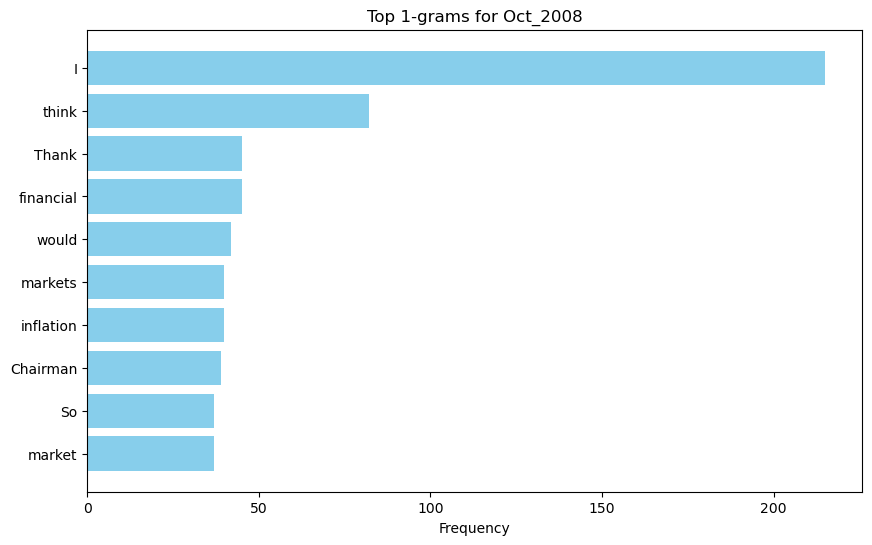

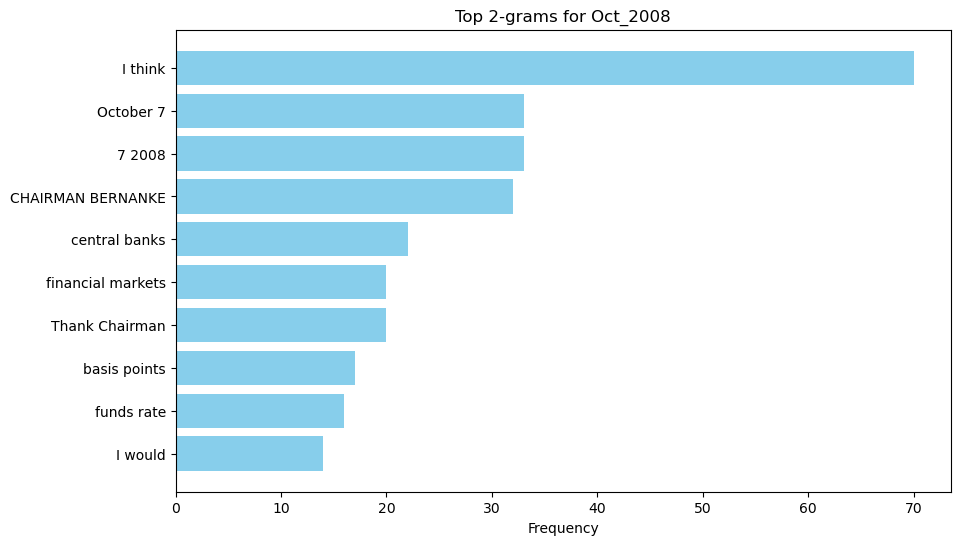

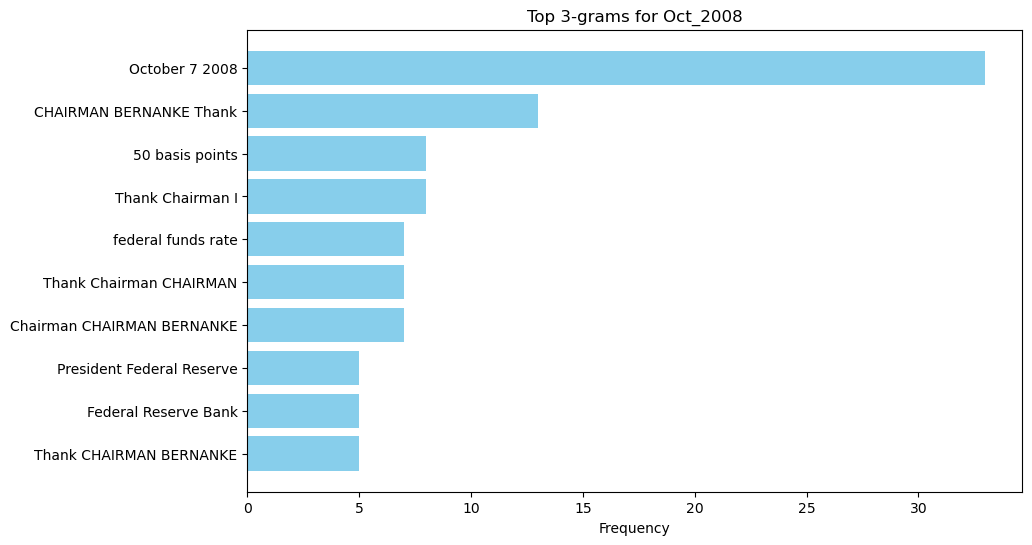

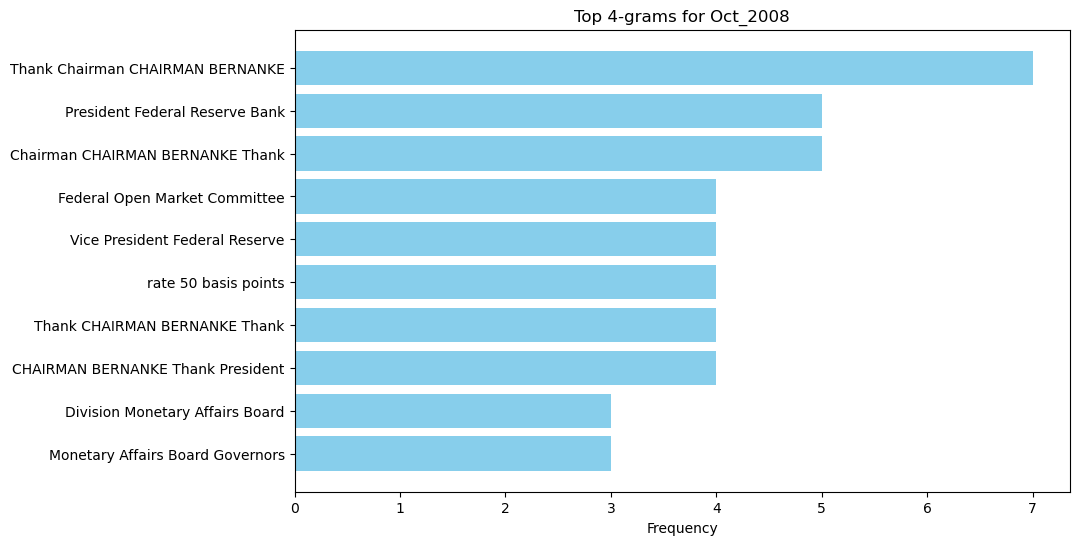

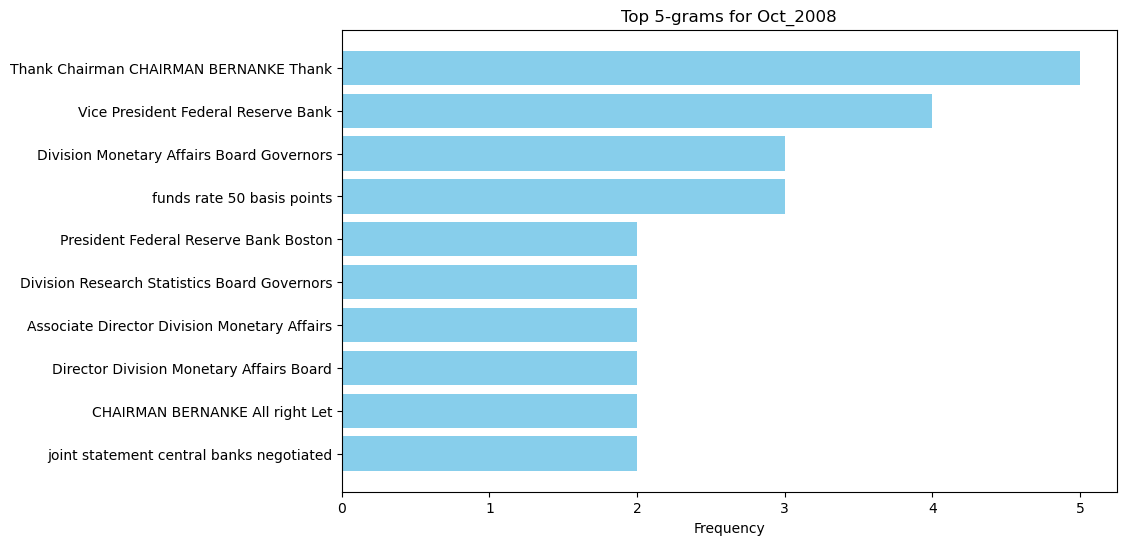

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Define stop words
stop_words = set(stopwords.words("english"))

# Function to clean and tokenize text, removing stop words
def clean_text(text):
    words = nltk.word_tokenize(text)
    cleaned_words = [word for word in words if word.isalnum() and word not in stop_words]
    return cleaned_words

# Function to generate n-gram frequencies
def get_ngram_frequencies(words, n):
    n_grams = ngrams(words, n)
    return Counter(n_grams)

# Function to plot n-grams
def plot_ngrams(frequencies, n, date):
    most_common = frequencies.most_common(10)  # Top 10 n-grams
    ngrams_labels, counts = zip(*most_common)
    ngrams_labels = [' '.join(ngram) for ngram in ngrams_labels]  # Convert tuples to strings
    
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams_labels, counts, color="skyblue")
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams for {date}")
    plt.gca().invert_yaxis()  # Show the most frequent on top
    plt.show()

# Perform analysis and plotting directly on the `speeches_text` dictionary
for date, text in speeches_text.items():
    print(f"\nAnalyzing {date} speech...")
    
    # Clean text and remove stop words
    words = clean_text(text)
    
    # Generate and plot n-grams from 1 to 5
    for n in range(1, 6):
        ngram_freq = get_ngram_frequencies(words, n)
        plot_ngrams(ngram_freq, n, date)


### Method - LDA Analysis and approach explained:

Here I try to use LDA (Latent Dirichlet Allocation), and I'm going down the vector based approach. I chose this to see compare and contrast the interest in topics of concern specific to the crisis vs topics of regular concern, how these have moved over the five months under study. 

Drawing upon the conceptual framework in Ruman**(2023) I define 13 broad topic areas with sample keywords in each topic. These topics fall into three categories:

1. Crucial to the crisis (housing, housing bubble, weakness related terms, financial markets)
2. Usual Fed policy and objectives which are expected to be in discussions pre crisis and are not necessarily crisis 
restricted (policy response, inflation, macroeconomics, bank liquidity) 
3. Procedural/misc topics (minutes, charts and data).

I anticipate that the majority of the tokens in the text will fall under these broader themes. Now LDA will help me understand the 
movement of interest along these different topics over time. I have additionally stemmed the words to capture similar words better.

----------------------
 ###  Insights from results:
* September marked the peak of the crisis after the Lehman brothers collapse, and the financial markets were in a freefall.
* The theory that I'm building from these visualizations is that the focus of the Fed on the regular macroeconomic concerns like inflation must have have taken a backseat during the peak of the crisis as interest in more pressing issues like housing, financial markets and weakness would have taken over the discussions.
* Financial markets especially being completely flat prior to September and then peaking off indicates this notion among committee members (who are predominantly econ PhDs) that the "real economy" is mostly insulated from the happenings of the financial markets. On the flip side we can see discussion on regular objectives came down during the crisis periods, including inflation which happens to be centre of discussion otherwise.
* Having said all this, expanding this analysis to more than just 5 transcripts is needed to establish a more reliable result, which I would love to explore given more time, this is such an interesting problem!

** link to paper - https://www.sciencedirect.com/science/article/pii/S1042443123000902


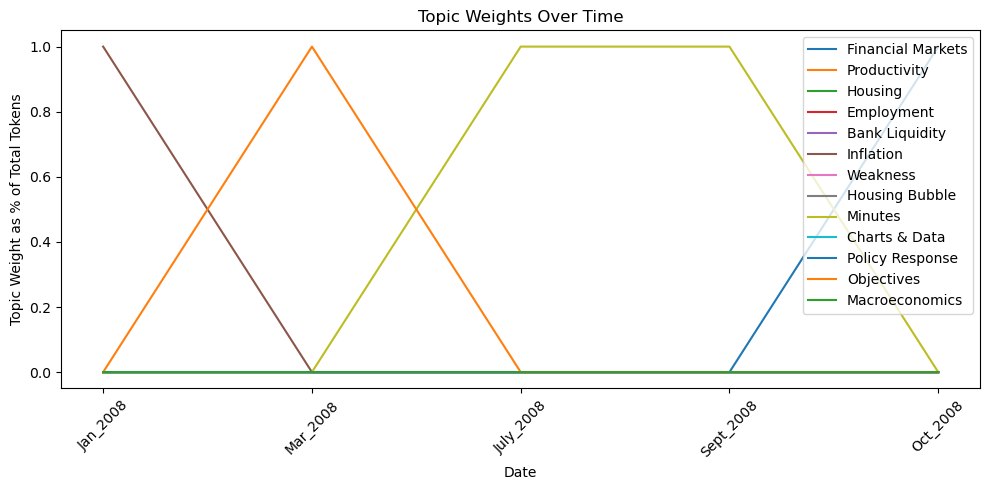

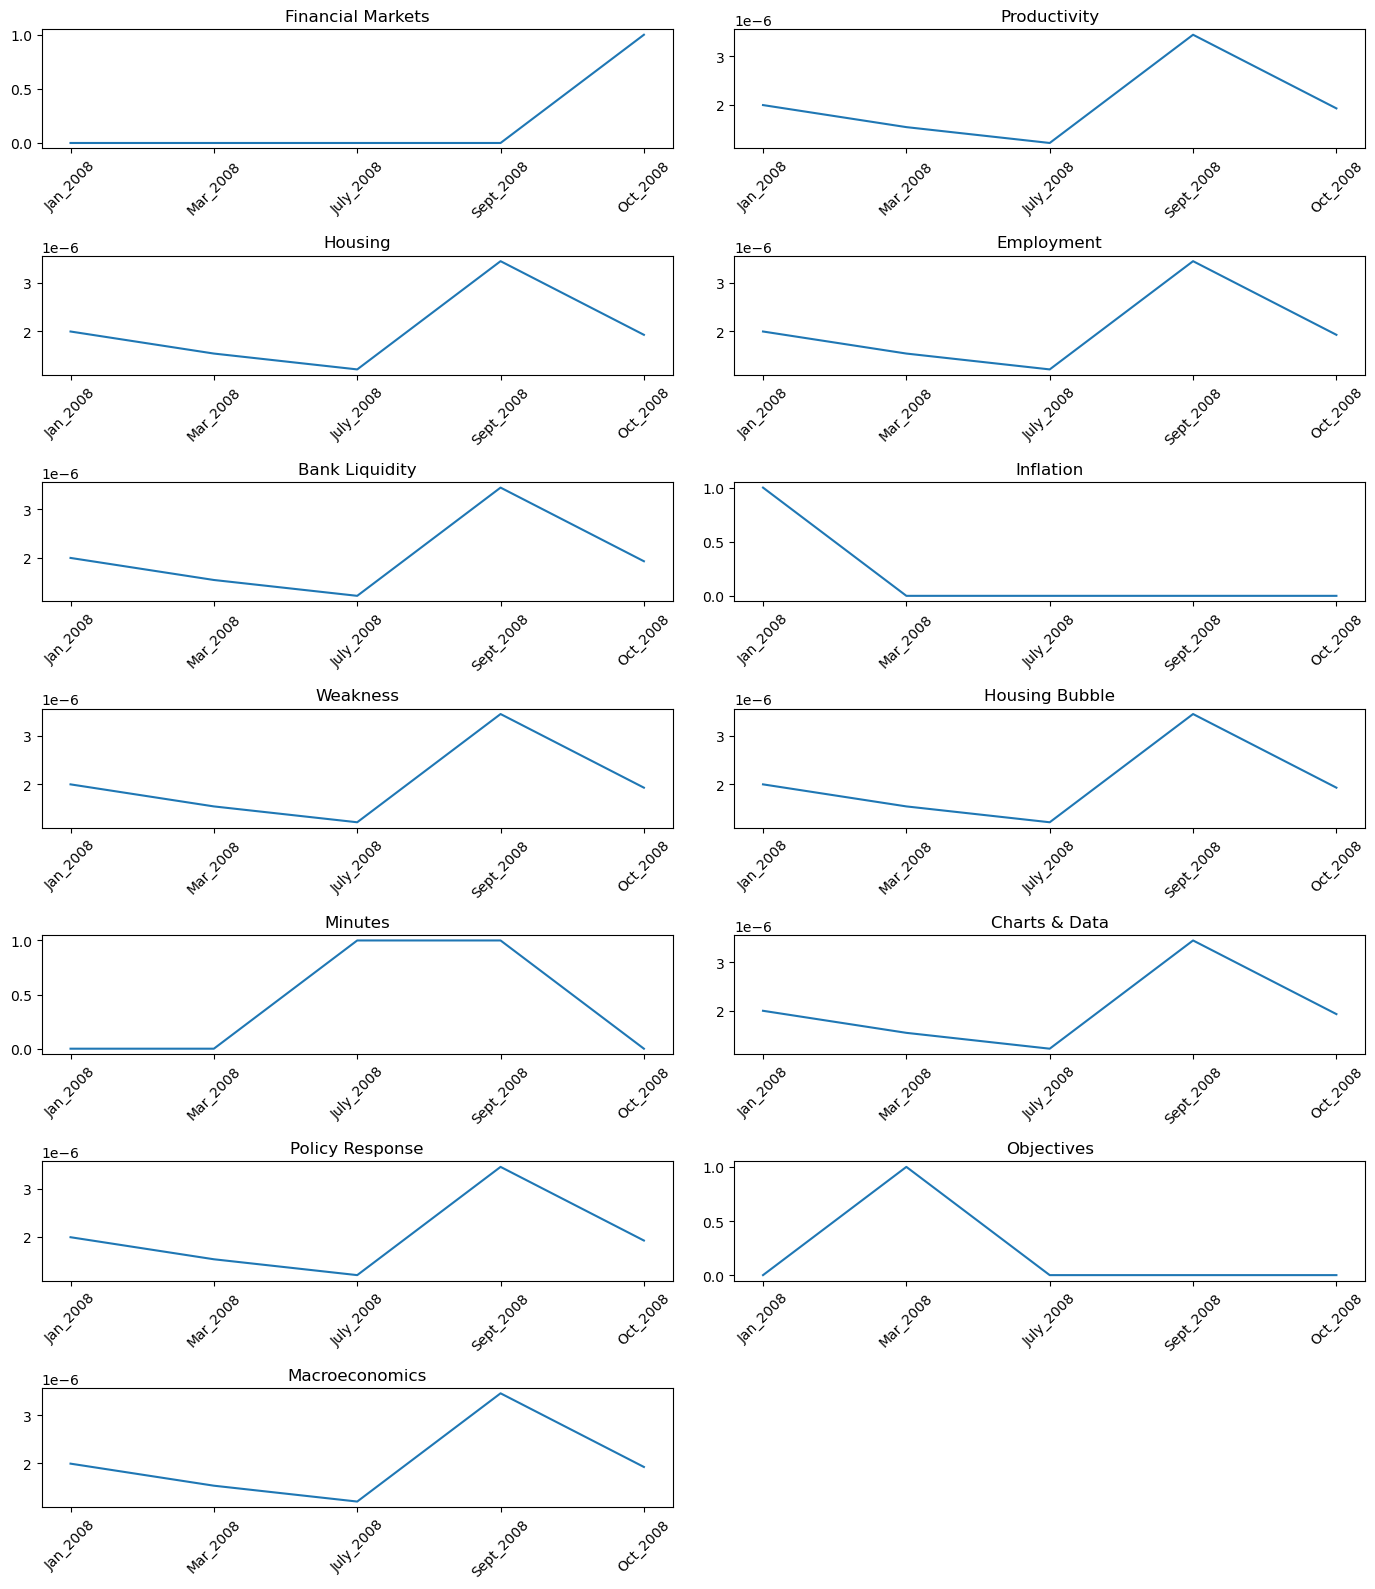

In [4]:
# Import necessary libraries for LDA, stemming, and visualization
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer

# Define the full list of 13 topics with keywords
topics_keywords = {
    "Financial Markets": ["financial", "credit", "banks", "turmoil", "risk", "institutions", "cut", "cdo", "losses", "loans", "market", "mortgage", "downside", "deterioration", "liquidity", "swap", "commercial", "agencies", "auction", "october", "capital", "lending", "asset", "stress", "insurance", "model", "sheet", "exposure", "spreads"],
    "Productivity": ["productivity", "growth", "slowing", "nairu", "labor", "acceleration", "supply", "tight", "wage", "tightening", "inflation", "treasury", "demand", "year", "prices", "tech", "stock", "increase", "earnings", "trend", "workers", "rise", "euro", "higher", "unemployment", "technology", "deepening", "pressures", "oil"],
    "Housing": ["housing", "inflation", "growth", "core", "moderate", "president", "thank", "section", "language", "residential", "alternative", "bit", "home", "energy", "forecast", "trend", "comfortable", "data", "past", "public", "poole", "slightly", "predominant", "think", "ceo", "prices", "labor", "spillover", "subprime", "uncertainty"],
    "Employment": ["employment", "improvement", "productivity", "growth", "hiring", "recovery", "business", "job", "ten", "gap", "disinflation", "tax", "expansion", "output", "dollar", "pickup", "equipment", "july", "accommodative", "june", "spending", "strong", "positive", "recommendation", "labor", "strength", "data", "fiscal", "inventory", "recent"],
    "Bank Liquidity": ["april", "commodity", "pdcf", "lehman", "prices", "inflation", "facility", "system", "tslf", "options", "june", "headline", "institutions", "repo", "voluntary", "primary", "stress", "stigma", "dis", "stearns", "dealers", "reserve", "party", "solvency", "exigent", "sec", "march", "oil", "financial", "merrill"],
    "Inflation": ["prices", "inflation", "pace", "pass", "increase", "pause", "energy", "tightening", "core", "costs", "compensation", "higher", "oil", "measures", "neutral", "statement", "contained", "language", "remove", "accommodative", "data", "china", "path", "move", "rise", "markup", "graphs", "expectations", "pressures", "solid"],
    "Weakness": ["weakness", "easing", "sales", "stimulus", "fiscal", "inventory", "attacks", "spending", "cut", "tech", "consumer", "investment", "november", "economy", "sector", "recession", "manufacturing", "recovery", "september", "industry", "travel", "auto", "weakening", "decline", "basis", "economic", "stock", "downside", "holiday"],
    "Housing Bubble": ["bubble", "rent", "housing", "land", "mortgage", "home", "thank", "overvalued", "ratio", "arms", "properties", "afford", "ofheo", "percentile", "value", "ltv", "exhibit", "hedge", "misalignme", "loans", "shown", "index", "miami", "gse", "nonmarket", "constant", "lenders", "family", "upper", "misallocation"],
    "Minutes": ["minutes", "release", "statement", "committee", "public", "communication", "draft", "language", "think", "formulaic", "vote", "expediting", "members", "announcement", "editing", "nineteen", "discussion", "meeting", "decision", "words", "view", "process", "issue", "blackout", "say", "use", "information", "agree"],
    "Charts & Data": ["Panel", "Model", "Us", "Line", "Chart", "Economy", "Black", "Rule", "Right", "Middle", "Red", "Present", "Bottom", "depreciation", "simulations", "Dollar", "Exhibit", "Taylor", "Show", "adjustment", "Foreign", "productivity", "Rate", "Frb", "Top", "Ratio", "Profits", "Variables", "coefficients", "Exchange"],
    "Policy Response": ["Target", "Reserve", "Zero", "Bound", "Program", "Sheet", "Funds", "December", "Federal", "Rate", "Facility", "quantitative", "Deflation", "Quantity", "Ceiling", "Size", "Monetary", "Banks", "Excess", "Purchases", "Interest", "Treasury", "Tools", "Securities", "Guarantee", "communication", "Regime", "Policy", "Money", "nonstandard"],
    "Objectives": ["objective", "goal", "numerical", "explicit", "narrative", "inflation", "mandate", "range", "target", "stability", "communication", "dual", "congress", "diversity", "adopt", "public", "achieve", "horizon", "section", "specific", "regime", "cpi", "definition", "benefits", "central", "transparency", "committee", "run", "think", "anchored"],
    "Macroeconomics": ["interest", "rate", "gdp", "year", "inflation", "unemployment", "one", "expectations", "point", "may", "forecast", "also", "now", "percent", "growth", "economy", "term", "policy", "risk", "like", "well", "continue", "last", "much", "even", "can", "see", "seems", "real", "months"]
}

# Step 1: Prepare text data for vectorization with stemming
documents = list(speeches_text.values())
dates = list(speeches_text.keys())

# Initialize the SnowballStemmer
stemmer = SnowballStemmer("english")

# Apply stemming to each document
stemmed_documents = [" ".join([stemmer.stem(word) for word in doc.split()]) for doc in documents]

# Step 2: Vectorize the stemmed documents using CountVectorizer
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
document_term_matrix = vectorizer.fit_transform(stemmed_documents)

# Step 3: Set up and fit LDA model
lda = LatentDirichletAllocation(
    n_components=13,
    random_state=42,
    max_iter=100,
    learning_method='batch',
    doc_topic_prior=0.01,  # Alpha value
    topic_word_prior=0.1    # Beta value
)
lda.fit(document_term_matrix)

# Step 4: Get the topic distribution for each document
doc_topic_distribution = lda.transform(document_term_matrix)

# Step 5: Calculate the weight of each topic per document as a percentage of total tokens
topic_weights_df = pd.DataFrame(doc_topic_distribution, columns=[f'Topic_{i+1}' for i in range(lda.n_components)], index=dates)

# Step 6: Plot topic weights over time as a percentage of total tokens
plt.figure(figsize=(10, 5))

# Use the topic names from topics_keywords for the legend
for i in range(lda.n_components):
    topic_name = list(topics_keywords.keys())[i]  # Get the name of the topic
    plt.plot(topic_weights_df.index, topic_weights_df[f'Topic_{i+1}'], label=topic_name)

plt.title('Topic Weights Over Time')
plt.xlabel('Date')
plt.ylabel('Topic Weight as % of Total Tokens')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Create subplots with topic names in each panel's title
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 16))  # 7 rows and 2 columns for 13 topics
axes = axes.flatten()  # Flatten the axes array to easily iterate over them

# Loop through the topics and plot each one in its own panel
for i in range(lda.n_components):
    topic_name = list(topics_keywords.keys())[i]  # Get the name of the topic
    axes[i].plot(topic_weights_df.index, topic_weights_df[f'Topic_{i+1}'], label=topic_name)
    axes[i].set_title(topic_name)  # Set the title of each subplot as the topic name
    axes[i].tick_params(axis='x', rotation=45)

# Remove any extra subplots
for j in range(lda.n_components, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


###  Approach taken

The approach of the analysis involved categorizing phrases in the transcripts into three categories: Hesitation to Predict Severe Crisis, Belief in Temporary Setbacks, and Confidence in Fed Interventions. These categories were designed to capture language reflecting uncertainty or belief in a quick resolution (hesitation), optimism about short-term recovery (temporary setbacks), and confidence in the effectiveness of Federal Reserve actions to manage the crisis. By tracking the frequency of these categories across different months in 2008, we can assess the Fed's evolving view on the severity and duration of the crisis.

### Insights from results

The results show a clear trend where Hesitation to Predict Severe Crisis was low, suggesting a lack of early acknowledgment of the crisis's potential severity. In contrast, Belief in Temporary Setbacks was more prevalent early in the year, with fluctuations indicating some fading optimism as the year progressed. Meanwhile, Confidence in Fed Interventions was strongest in January, reflecting strong belief in the Fed’s ability to address the crisis, but it declined over time, especially as the situation worsened in the latter part of the year. Overall, the analysis suggests that while the Fed initially believed the situation could be managed and was optimistic about quick recovery, this confidence gradually waned as the crisis unfolded.

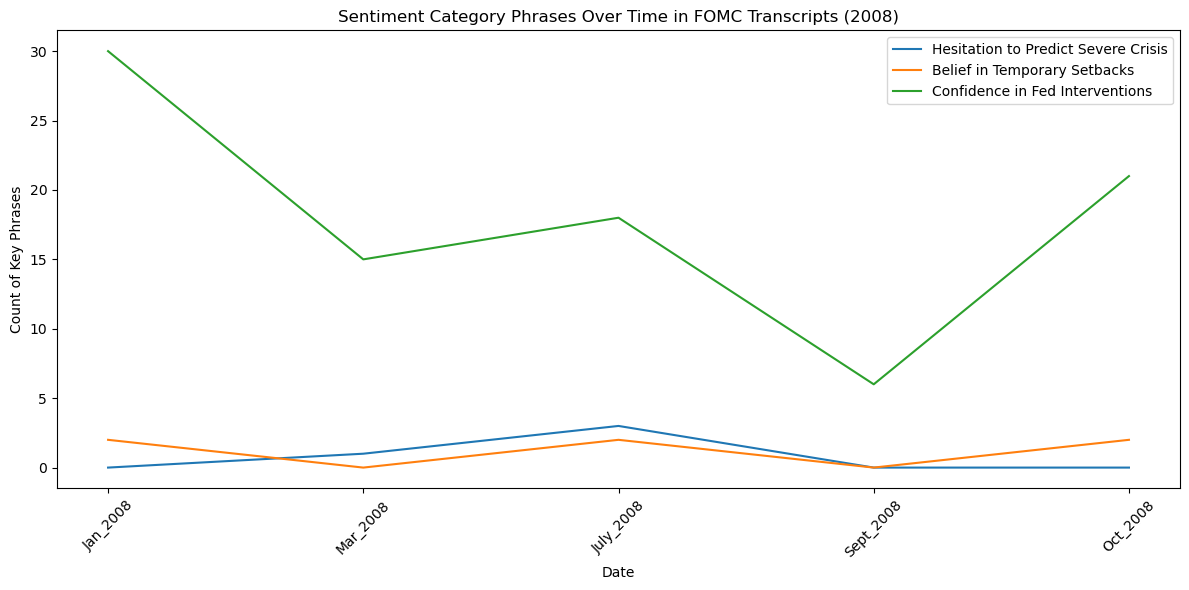

In [17]:
#Your code here:
# Import necessary NLP libraries
import re
from collections import defaultdict

# Define categories and their indicative phrases
phrase_categories = {
    "Hesitation to Predict Severe Crisis": [
        "temporary", "setback", "not last", "short-lived", "manageable", "contained", 
        "limited", "not systemic", "localized", "unlikely"
    ],
    "Belief in Temporary Setbacks": [
        "short-term", "transient", "temporary effect", "reversible", "not a long-term", 
        "manageable", "mild", "not severe", "momentary"
    ],
    "Confidence in Fed Interventions": [
        "Fed response", "intervention", "prevent collapse", "stabilize", "addressed", 
        "mitigate", "support", "ensure liquidity", "preserve", "calming effect"
    ]
}

# Compile regular expressions for each phrase category
phrase_patterns = {category: [re.compile(r'\b' + phrase + r'\b') for phrase in phrases]
                   for category, phrases in phrase_categories.items()}

# Process each stemmed document to find instances of phrases
phrase_counts = defaultdict(lambda: defaultdict(int))  # category -> date -> count

# Loop through each document to identify phrases
for date, doc in zip(dates, stemmed_documents):
    for category, patterns in phrase_patterns.items():
        # Count occurrences of each phrase within the document
        count = sum(len(pattern.findall(doc)) for pattern in patterns)
        phrase_counts[category][date] += count

# Convert phrase counts to a DataFrame for analysis
phrase_counts_df = pd.DataFrame(phrase_counts).fillna(0)
phrase_counts_df.index = dates

# Plot phrase counts over time for each sentiment category
plt.figure(figsize=(12, 6))
for category in phrase_categories.keys():
    plt.plot(phrase_counts_df.index, phrase_counts_df[category], label=category)

plt.title("Sentiment Category Phrases Over Time in FOMC Transcripts (2008)")
plt.xlabel("Date")
plt.ylabel("Count of Key Phrases")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Key participants and their sentiment over time


### Approach

Here I first extract the speaker names, segment text by speaker, visualize the sentiment scores monthwise for all speakers, then speaker wise for all months, and finally the compound score movements for all members jointly through the months along with a dispersion. 

### Extracting speaker names from first two pages of the transcripts

In [11]:
import re
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# Function to extract names from text using regular expressions
def extract_names(text):
    # Pattern to match names after 'Mr.', 'Ms.', or 'Messrs.'
    name_pattern = r"\b(?:Mr\.|Ms\.|Messrs\.)\s+([A-Z][a-z]+)"
    names = re.findall(name_pattern, text)
    return names

# Function to download PDF, extract text from the first two pages, and find names
def extract_first_two_pages_text_and_names(url_dict):
    names_dict = {}  # Dictionary to store extracted names

    for date, url in url_dict.items():
        response = requests.get(url)
        
        # Check if the response is a PDF
        if response.headers['Content-Type'] == 'application/pdf':
            pdf_file = BytesIO(response.content)
            reader = PdfReader(pdf_file)
            document_text = ""
            
            # Extract text from the first two pages only
            for i, page in enumerate(reader.pages[:2]):  # Only process the first two pages
                text = page.extract_text()
                if text:  # Ensure text extraction succeeded
                    document_text += text
            
            # Extract names from the combined text of the first two pages
            names = extract_names(document_text)
            names_dict[date] = names
            print(f"Names extracted for {date}: {names}")
        
        else:
            print(f"Failed to download PDF from {url}. Received content type:", response.headers['Content-Type'])
    
    return names_dict

# Execute extraction and store names from the first two pages
names_from_first_two_pages = extract_first_two_pages_text_and_names(pdf_urls)

# names_from_first_two_pages now contains a list of names for each transcript date



Names extracted for Jan_2008: ['Bernanke', 'Geithner', 'Evans', 'Hoenig', 'Kohn', 'Kroszner', 'Poole', 'Rosengren', 'Warsh', 'Fisher', 'Pianalto', 'Plosser', 'Lacker', 'Yellen', 'Madigan', 'Danker', 'Skidmore', 'Smith', 'Alvarez', 'Baxter', 'Sheets', 'Stockton', 'Clouse', 'Dudley', 'English', 'Dale', 'Levin', 'Luecke', 'Judd', 'Mester', 'Weinberg', 'Hakkio']
Names extracted for Mar_2008: ['Bernanke', 'Geithner', 'Fisher', 'Kohn', 'Kroszner', 'Pianalto', 'Plosser', 'Warsh', 'Cumming', 'Evans', 'Yellen', 'Hoenig', 'Sapenaro', 'Madigan', 'Danker', 'Skidmore', 'Smith', 'Alvarez', 'Baxter', 'Stockton', 'Kamin', 'Mester', 'Rosenblum', 'Dudley', 'Clouse', 'Struckmeyer', 'Leahy', 'Liang', 'Blanchard', 'Fuhrer', 'Altig', 'Perelmuter', 'Rasche', 'Logan']
Names extracted for July_2008: ['Bernanke', 'Geithner', 'Kohn', 'Kroszner', 'Mishkin', 'Pianalto', 'Plosser', 'Stern', 'Warsh', 'Cumming', 'Evans', 'Yellen', 'Bullard', 'Madigan', 'Danker', 'Skidmore', 'Smith', 'Alvarez', 'Baxter', 'Stockton', '

### Segment text by speaker in the transcripts

In [12]:
#Your code here:

import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Store sentiment results
sentiment_results = {}
overall_scores = {}

# Function to segment text by speaker for the full document
def segment_text_by_speaker_full_document(text, speaker_names):
    segments = {}
    # Regex pattern to match each speaker name followed by text
    pattern = r'(' + '|'.join([re.escape(name) for name in speaker_names]) + r')'
    
    # Split text by speaker names, include delimiters
    split_text = re.split(pattern, text)
    
    for i in range(1, len(split_text) - 1, 2):
        speaker = split_text[i].strip()
        segment = split_text[i + 1].strip()
        
        # Append segment to the speaker's text
        if speaker in segments:
            segments[speaker] += " " + segment
        else:
            segments[speaker] = segment
            
    return segments

### Perform sentiment analysis to figure out most positive, negative and highest change speakers

In [13]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Store sentiment results
sentiment_results = {}
overall_scores = {}
speaker_scores = {}

# Function to segment text by speaker for the full document
def segment_text_by_speaker_full_document(text, speaker_names):
    segments = {}
    pattern = r'(' + '|'.join([re.escape(name) for name in speaker_names]) + r')'
    split_text = re.split(pattern, text)
    
    for i in range(1, len(split_text) - 1, 2):
        speaker = split_text[i].strip()
        segment = split_text[i + 1].strip()
        if speaker in segments:
            segments[speaker] += " " + segment
        else:
            segments[speaker] = segment
    return segments

# Loop over each transcript and perform sentiment analysis
for date, text in speeches_text.items():
    segments = segment_text_by_speaker_full_document(text, names_from_first_two_pages[date])
    date_sentiment = {}
    total_compound = 0
    num_speakers = len(segments)
    
    for speaker, text_segment in segments.items():
        sentiment = analyzer.polarity_scores(text_segment)
        sentiment_label = 'Positive' if sentiment['compound'] >= 0 else 'Negative'
        
        date_sentiment[speaker] = {'Sentiment': sentiment_label, 'Compound': sentiment['compound']}
        total_compound += sentiment['compound']
        
        if speaker not in speaker_scores:
            speaker_scores[speaker] = []
        speaker_scores[speaker].append(sentiment['compound'])
    
    overall_scores[date] = total_compound / num_speakers
    sentiment_results[date] = date_sentiment

average_overall_score = sum(overall_scores.values()) / len(overall_scores)
print("Average Overall Sentiment Score:", average_overall_score)

# Find speakers with most positive and negative average sentiments
average_sentiments = {speaker: sum(scores) / len(scores) for speaker, scores in speaker_scores.items()}
max_avg_sentiment = max(average_sentiments.values())
min_avg_sentiment = min(average_sentiments.values())

most_positive_speakers = [speaker for speaker, avg in average_sentiments.items() if avg == max_avg_sentiment]
most_negative_speakers = [speaker for speaker, avg in average_sentiments.items() if avg == min_avg_sentiment]

print(f"The speakers with the most positive average sentiment ({max_avg_sentiment:.2f}):", ', '.join(most_positive_speakers))
print(f"The speakers with the most negative average sentiment ({min_avg_sentiment:.2f}):", ', '.join(most_negative_speakers))

# Find highest and lowest sentiment scores across all scores
all_scores_with_speakers = [(speaker, score) for speaker, scores in speaker_scores.items() for score in scores]
max_score = max(score for _, score in all_scores_with_speakers)
min_score = min(score for _, score in all_scores_with_speakers)

highest_score_speakers = [speaker for speaker, score in all_scores_with_speakers if score == max_score]
lowest_score_speakers = [speaker for speaker, score in all_scores_with_speakers if score == min_score]

print(f"The highest score ({max_score:.2f}) was by:", ', '.join(highest_score_speakers))
print(f"The lowest score ({min_score:.2f}) was by:", ', '.join(lowest_score_speakers))

# Find speaker with the greatest sentiment change across months
sentiment_changes = {speaker: max(scores) - min(scores) for speaker, scores in speaker_scores.items()}
max_change = max(sentiment_changes.values())
most_change_speakers = [speaker for speaker, change in sentiment_changes.items() if change == max_change]

print(f"The speakers with the greatest sentiment change ({max_change:.2f}):", ', '.join(most_change_speakers))

# Filter for speakers who appeared in at least 4 out of 5 transcripts
frequent_speakers = {speaker: scores for speaker, scores in speaker_scores.items() if len(scores) >= 4}

# Repeat calculations for frequent speakers
if frequent_speakers:
    average_sentiments_frequent = {speaker: sum(scores) / len(scores) for speaker, scores in frequent_speakers.items()}
    max_avg_sentiment_frequent = max(average_sentiments_frequent.values())
    min_avg_sentiment_frequent = min(average_sentiments_frequent.values())

    most_positive_speakers_frequent = [speaker for speaker, avg in average_sentiments_frequent.items() if avg == max_avg_sentiment_frequent]
    most_negative_speakers_frequent = [speaker for speaker, avg in average_sentiments_frequent.items() if avg == min_avg_sentiment_frequent]

    print(f"\nAmong frequent speakers (4+ times):")
    print(f"The speakers with the most positive average sentiment ({max_avg_sentiment_frequent:.2f}):", ', '.join(most_positive_speakers_frequent))
    print(f"The speakers with the most negative average sentiment ({min_avg_sentiment_frequent:.2f}):", ', '.join(most_negative_speakers_frequent))

    all_scores_frequent = [(speaker, score) for speaker, scores in frequent_speakers.items() for score in scores]
    max_score_frequent = max(score for _, score in all_scores_frequent)
    min_score_frequent = min(score for _, score in all_scores_frequent)

    highest_score_speakers_frequent = [speaker for speaker, score in all_scores_frequent if score == max_score_frequent]
    lowest_score_speakers_frequent = [speaker for speaker, score in all_scores_frequent if score == min_score_frequent]

    print(f"The highest score among frequent speakers ({max_score_frequent:.2f}) was by:", ', '.join(highest_score_speakers_frequent))
    print(f"The lowest score among frequent speakers ({min_score_frequent:.2f}) was by:", ', '.join(lowest_score_speakers_frequent))

    sentiment_changes_frequent = {speaker: max(scores) - min(scores) for speaker, scores in frequent_speakers.items()}
    max_change_frequent = max(sentiment_changes_frequent.values())
    most_change_speakers_frequent = [speaker for speaker, change in sentiment_changes_frequent.items() if change == max_change_frequent]

    print(f"The speakers with the greatest sentiment change among frequent speakers ({max_change_frequent:.2f}):", ', '.join(most_change_speakers_frequent))


Average Overall Sentiment Score: 0.42151591124958776
The speakers with the most positive average sentiment (1.00): Krieger
The speakers with the most negative average sentiment (-0.21): Stockton
The highest score (1.00) was by: Krieger
The lowest score (-0.83) was by: Stockton
The speakers with the greatest sentiment change (1.56): Rosengren

Among frequent speakers (4+ times):
The speakers with the most positive average sentiment (0.99): Dudley
The speakers with the most negative average sentiment (-0.21): Stockton
The highest score among frequent speakers (1.00) was by: Geithner, Yellen
The lowest score among frequent speakers (-0.83) was by: Stockton
The speakers with the greatest sentiment change among frequent speakers (1.00): Yellen


### Visualizing sentiment scores of each meeting from Jan to Oct, showing dispersion in scores

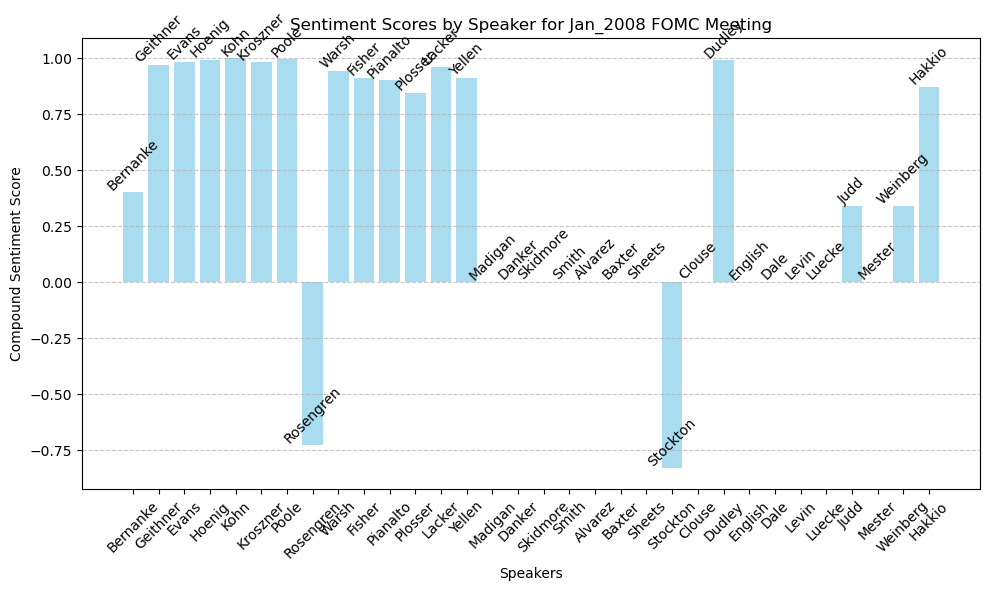

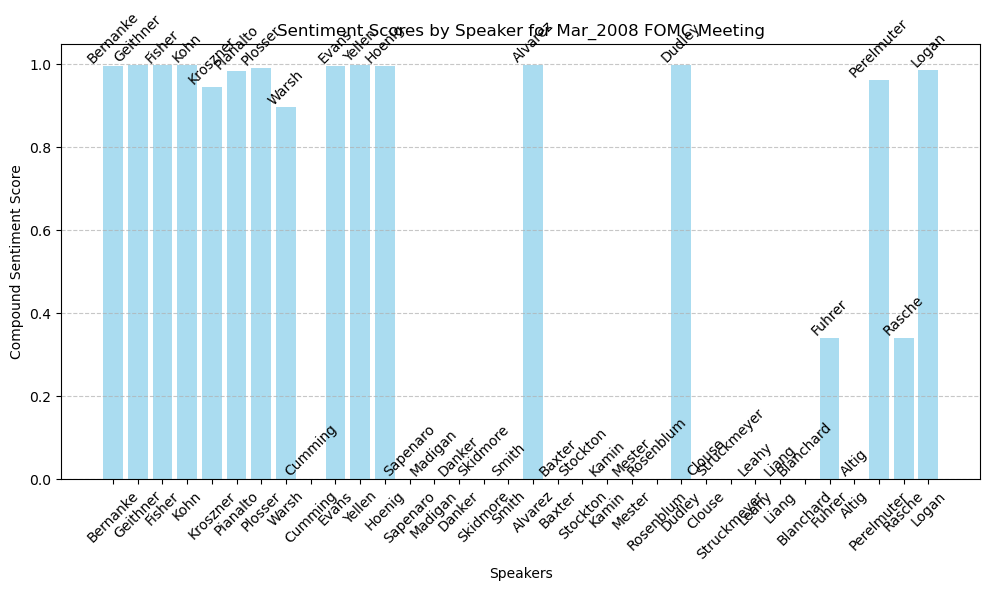

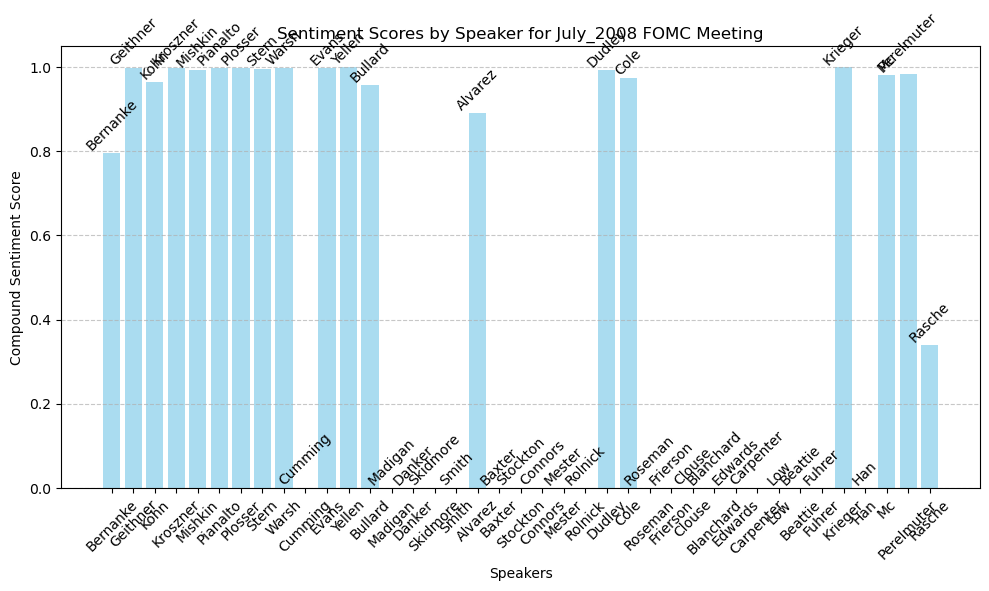

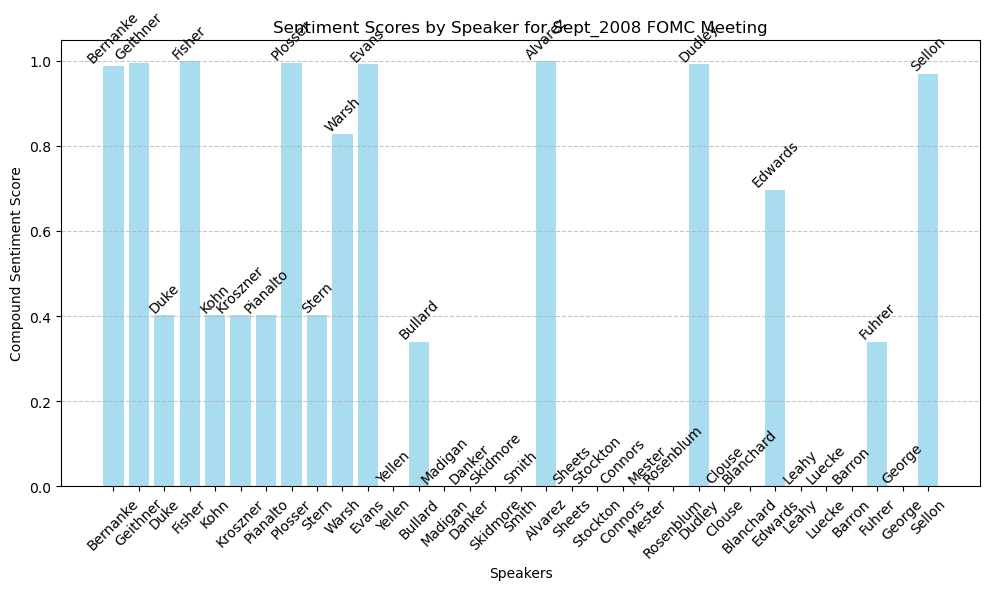

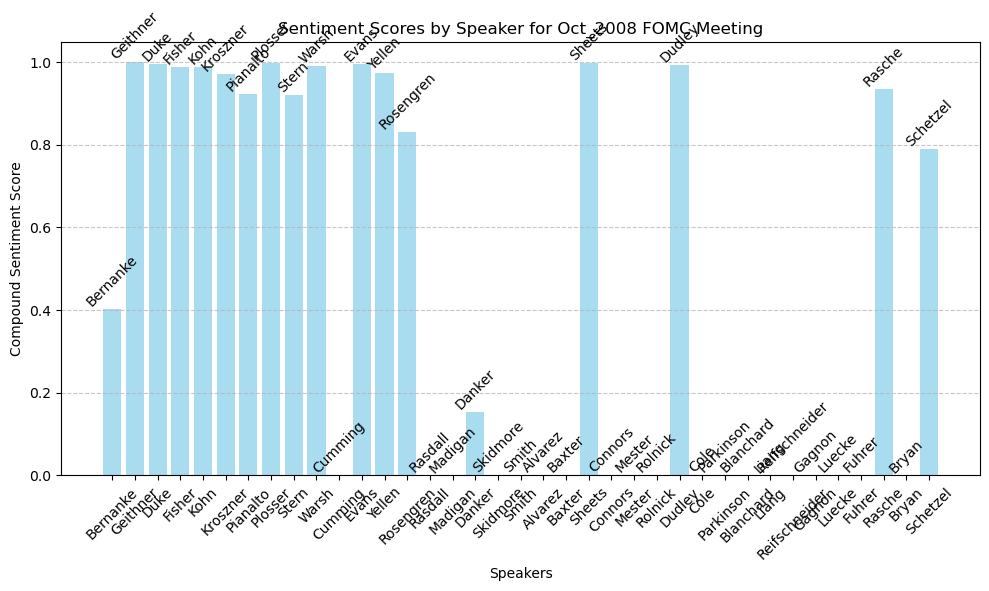

In [14]:
import numpy as np

# Visualization: One graph per meeting date
for date in dates:
    plt.figure(figsize=(10, 6))

    # Get the speakers and their corresponding sentiment scores
    speaker_names = list(sentiment_results[date].keys())
    compound_scores = [sentiment_results[date][speaker]['Compound'] for speaker in speaker_names]
    
    # Generate a range for the x-axis to space speakers evenly
    x_pos = np.arange(len(speaker_names))

    # Plot sentiment scores for the current meeting date
    plt.bar(x_pos, compound_scores, color='skyblue', alpha=0.7)

    # Add labels for each speaker at the correct x-axis position
    for i, speaker in enumerate(speaker_names):
        plt.text(x_pos[i], compound_scores[i], speaker, ha='center', va='bottom', fontsize=10, rotation=45)

    # Set title and labels
    plt.title(f"Sentiment Scores by Speaker for {date} FOMC Meeting")
    plt.xlabel("Speakers")
    plt.ylabel("Compound Sentiment Score")

    # Set x-ticks to be spaced evenly across the speakers
    plt.xticks(x_pos, speaker_names, rotation=45)

    # Add grid and make the layout tighter
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot for the current date
    plt.show()


### Showing sentiment scores speaker wise for every transcript they have spoken in

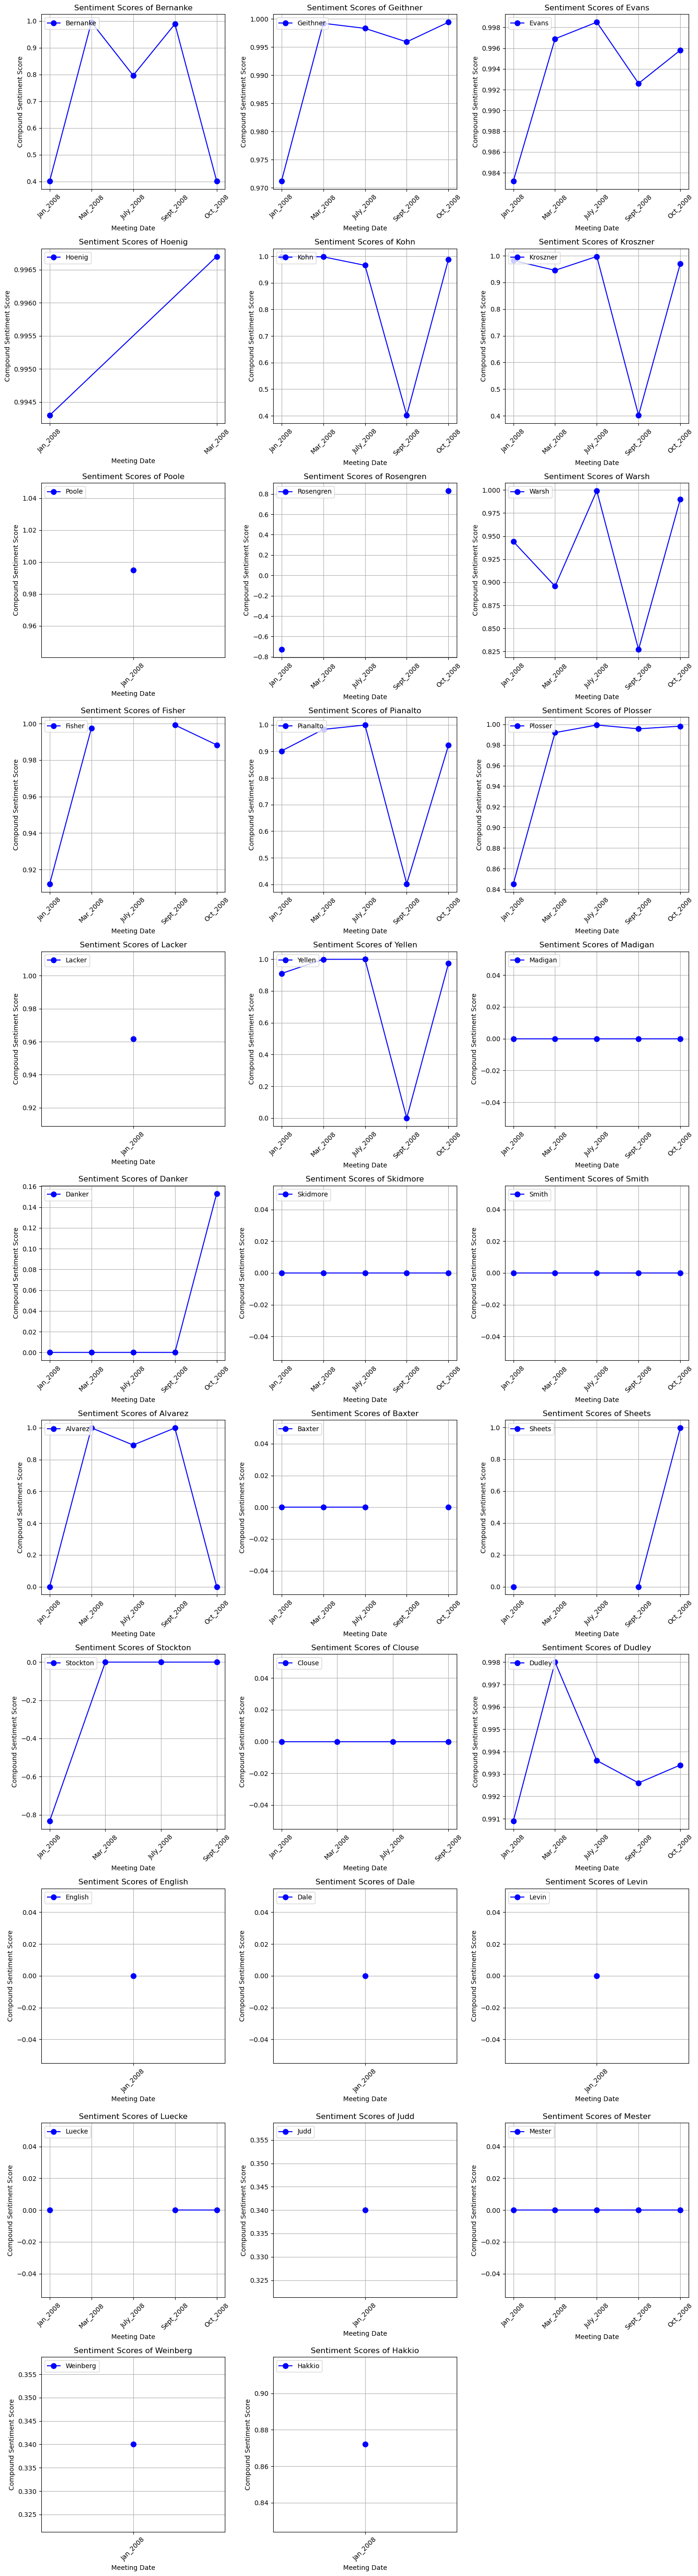

In [15]:
import math

# Number of speakers
num_speakers = len(sentiment_results[dates[0]].keys())

# Calculate grid size (e.g., 3 columns if there are 6 speakers, 2 rows)
cols = 3  # You can change this based on how many speakers you want per row
rows = math.ceil(num_speakers / cols)

# Create the subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes array for easier indexing if grid is more than 1 row
axes = axes.flatten()

# Visualization: One graph per speaker showing sentiment scores across dates
for i, speaker in enumerate(sentiment_results[dates[0]].keys()):
    ax = axes[i]  # Get the axis for the current speaker

    # Collect the sentiment scores for the current speaker across all dates
    speaker_scores = []
    
    for date in dates:
        # If the speaker spoke on that date, get the sentiment score, otherwise assign None or 0
        if speaker in sentiment_results[date]:
            speaker_scores.append(sentiment_results[date][speaker]['Compound'])
        else:
            speaker_scores.append(None)  # Or append 0 if you prefer a default value for missing data
    
    # Plot the sentiment scores as a line plot
    ax.plot(dates, speaker_scores, marker='o', label=speaker, color='b', linestyle='-', markersize=8)

    # Set the title and labels for this subplot
    ax.set_title(f"Sentiment Scores of {speaker}")
    ax.set_xlabel("Meeting Date")
    ax.set_ylabel("Compound Sentiment Score")

    # Rotate the x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Add grid for better readability
    ax.grid(True)
    
    # Display the legend
    ax.legend(loc='upper left')

# Remove any unused subplots if the number of speakers is not a perfect grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the plots
plt.show()


## Adding key makers to visualization that bring in the key events of 2008

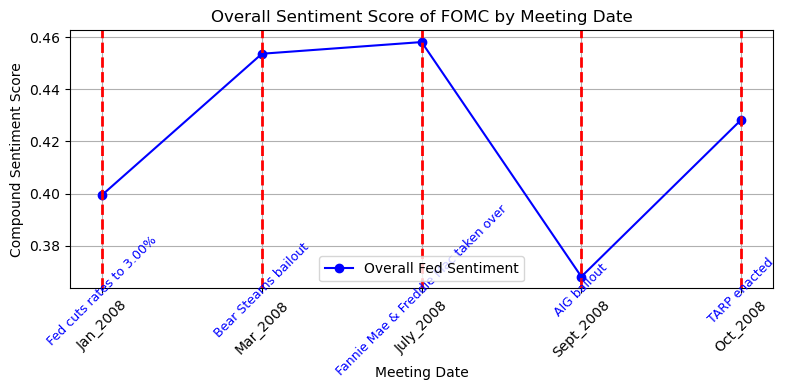

In [76]:
#Your code here:

import matplotlib.pyplot as plt

# Major events during the 2008 financial crisis (corrected to match the 'dates' format)
events = {
    'Jan_2008': "Fed cuts rates to 3.00%",
    'Mar_2008': "Bear Stearns bailout",
    'July_2008': "Fannie Mae & Freddie Mac taken over",
    'Sept_2008': "Lehman Brothers bankruptcy",
    'Sept_2008': "AIG bailout",
    'Oct_2008': "TARP enacted"
}

# Visualization
dates = list(overall_scores.keys())
overall_scores_list = list(overall_scores.values())

# Plot overall sentiment scores for each meeting
plt.figure(figsize=(8, 4))
plt.plot(dates, overall_scores_list, marker='o', color='b', label="Overall Fed Sentiment")
plt.title("Overall Sentiment Score of FOMC by Meeting Date")
plt.xlabel("Meeting Date")
plt.ylabel("Compound Sentiment Score")
plt.xticks(rotation=45)

# Mark financial crisis events on the graph
for event_date, event_label in events.items():
    if event_date in dates:
        # Add vertical line for the event
        plt.axvline(x=event_date, color='r', linestyle='--', linewidth=2)
        # Place the label near the x-axis (adjust y-value to be close to 0)
        y_value = min(overall_scores_list)  # Position close to the x-axis (lower y-value)
        # Annotate the event on the graph with adjusted position
        plt.annotate(event_label, (event_date, y_value), 
                     rotation=45, ha='center', va='center', color='b', fontsize=9, 
                     xytext=(0, -10), textcoords='offset points')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Changing sentiment of the Fed over time

### Visualizing movement of overall compound score and the dispersion of scores month wise

Average Overall Sentiment Score: 0.42151591124958776


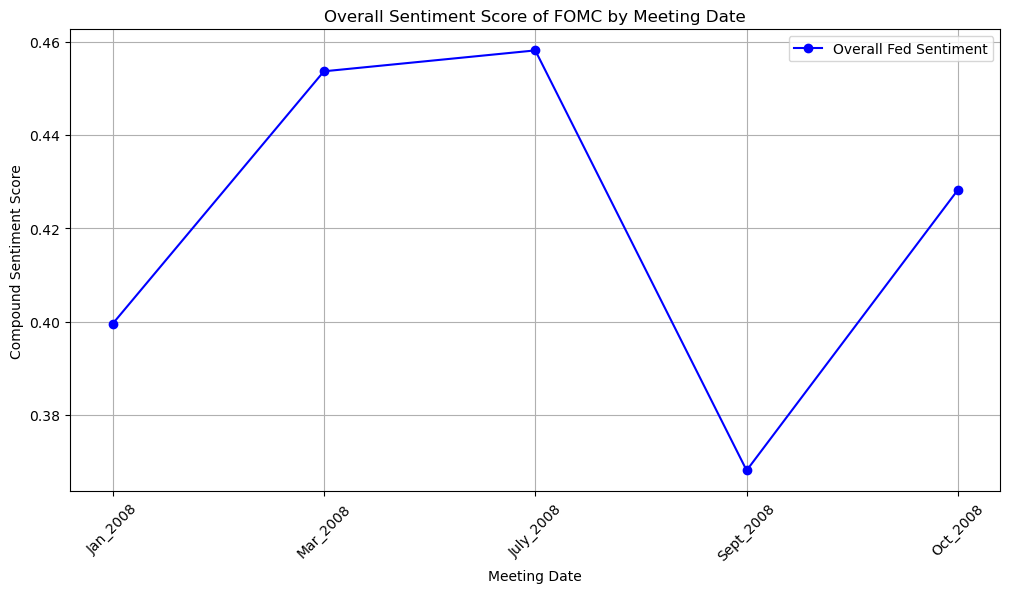

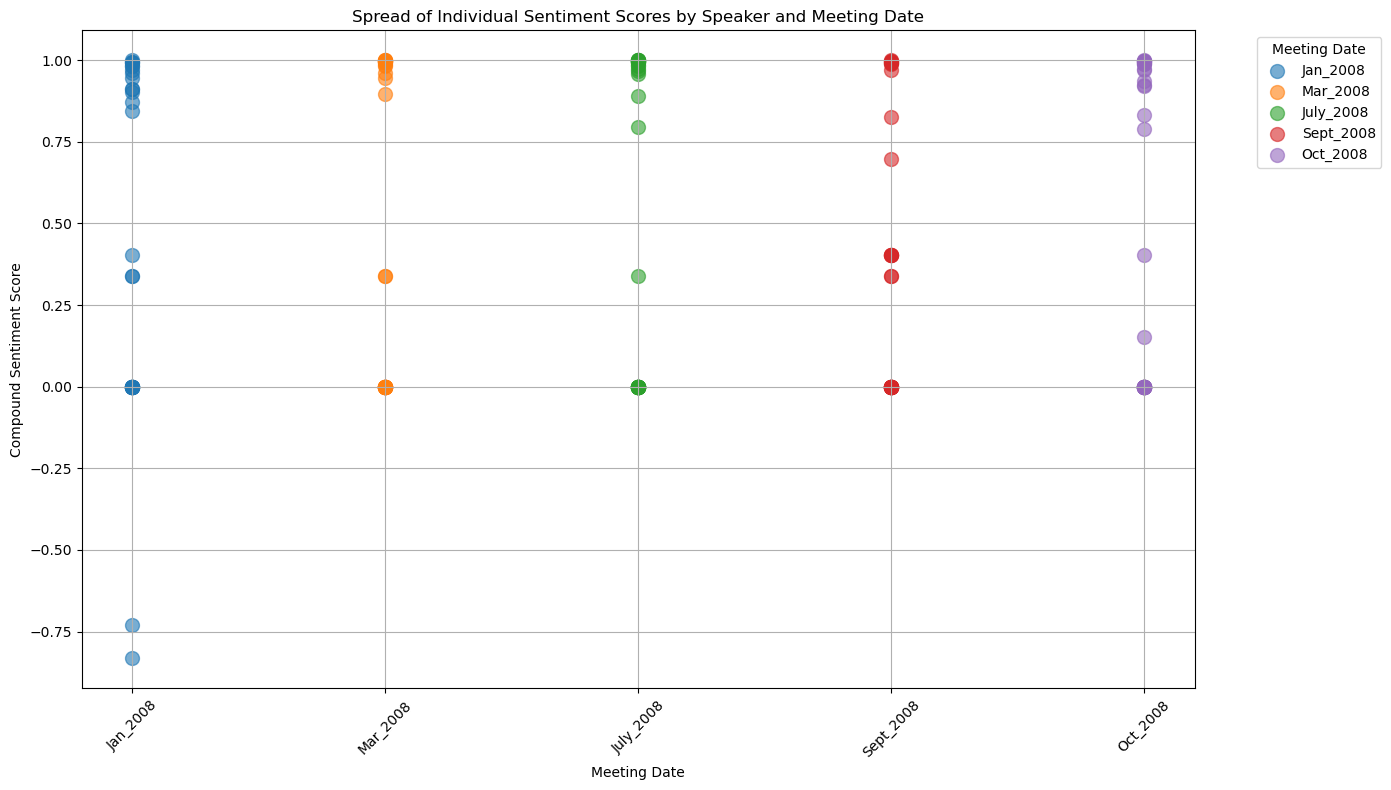

In [16]:
# Loop over each transcript and perform sentiment analysis
for date, text in speeches_text.items():
    # Segment the full document text by each speaker using extracted names
    segments = segment_text_by_speaker_full_document(text, names_from_first_two_pages[date])
    
    date_sentiment = {}
    total_compound = 0
    num_speakers = len(segments)
    
    for speaker, text_segment in segments.items():
        # Analyze sentiment of each speaker's text segment
        sentiment = analyzer.polarity_scores(text_segment)
        sentiment_label = 'Positive' if sentiment['compound'] >= 0 else 'Negative'
        
        # Store speaker sentiment results
        date_sentiment[speaker] = {'Sentiment': sentiment_label, 'Compound': sentiment['compound']}
        total_compound += sentiment['compound']
    
    # Calculate and store overall score for the date
    overall_scores[date] = total_compound / num_speakers
    sentiment_results[date] = date_sentiment

# Calculate average of overall scores
average_overall_score = sum(overall_scores.values()) / len(overall_scores)
print("Average Overall Sentiment Score:", average_overall_score)


# Display sentiment results (commenting this out to avoid long output to see graphs more easily)
#for date, speakers in sentiment_results.items():
#    print(f"--- Sentiment Analysis for {date} ---")
#    for speaker, sentiment in speakers.items():
#        print(f"{speaker}: {sentiment['Sentiment']} (Compound: {sentiment['Compound']})")
#    print(f"Overall Compound Score for {date}: {overall_scores[date]}")

# Visualization
dates = list(overall_scores.keys())
overall_scores_list = list(overall_scores.values())


# Plot overall sentiment scores for each meeting
plt.figure(figsize=(12, 6))
plt.plot(dates, overall_scores_list, marker='o', color='b', label="Overall Fed Sentiment")
plt.title("Overall Sentiment Score of FOMC by Meeting Date")
plt.xlabel("Meeting Date")
plt.ylabel("Compound Sentiment Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot individual member sentiment scores for each meeting

# Visualization
plt.figure(figsize=(14, 8))

# Loop through each date to plot individual sentiment scores for each speaker
for date in dates:
    speaker_names = list(sentiment_results[date].keys())
    compound_scores = [sentiment_results[date][speaker]['Compound'] for speaker in speaker_names]
    
    # Plot individual speaker sentiment scores for the current meeting date
    plt.scatter([date] * len(speaker_names), compound_scores, label=date, s=100, alpha=0.6)

# Set title and labels
plt.title("Spread of Individual Sentiment Scores by Speaker and Meeting Date")
plt.xlabel("Meeting Date")
plt.ylabel("Compound Sentiment Score")

# Rotate date labels for clarity
plt.xticks(rotation=45)

# Add a legend and grid for better readability
plt.legend(title="Meeting Date", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()




### Adding additional transcripts

I am adding additional transcripts by pulling all 2007 transcripts. 

Results indicate that 2007 had a lower compound score indicating that more severe negative terminologies appear in the previous year. 

Note: In the previous compound score analysis I aggregated member wise scores to calculate compund score, whereas here I am parsing the entire document to save time. Hence the difference in the 2008 values

In [77]:
#Your code here:
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# Dictionary of URLs with dates as keys for easy identification
pdf_urls1 = {
    "Jan_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf",
    "Mar_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf",
    "July_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf",
    "Sept_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf",
    "Oct_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf",
    "Jan_2007": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20070131meeting.pdf",
    "Mar_2007": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20070321meeting.pdf",
    "May_2007": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20070509meeting.pdf",
    "Jun_2007": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20070628meeting.pdf",
    "Aug_2007": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20070807meeting.pdf",
    "Sept_2007": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20070918meeting.pdf",
    "Oct_2007": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20071031meeting.pdf",
    "Dec_2007": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20071211meeting.pdf"
}


# Function to download and extract text from PDFs
def extract_texts_to_dict(url_dict):
    all_texts = {}  # Dictionary to store all extracted texts

    for date, url in url_dict.items():
        response = requests.get(url)
        
        # Check if the response is a PDF
        if response.headers['Content-Type'] == 'application/pdf':
            pdf_file = BytesIO(response.content)
            reader = PdfReader(pdf_file)
            document_text = ""
            
            # Extract text from each page
            for page in reader.pages:
                text = page.extract_text()
                if text:  # Ensure text extraction succeeded for each page
                    document_text += text
            
            # Store extracted text in the dictionary with the date as the key
            all_texts[date] = document_text
            print(f"Text for {date} has been extracted and stored in memory.")
        
        else:
            print(f"Failed to download PDF from {url}. Received content type:", response.headers['Content-Type'])
    
    return all_texts

# Execute extraction and store texts in the dictionary
speeches_text1 = extract_texts_to_dict(pdf_urls1)



Text for Jan_2008 has been extracted and stored in memory.
Text for Mar_2008 has been extracted and stored in memory.
Text for July_2008 has been extracted and stored in memory.
Text for Sept_2008 has been extracted and stored in memory.
Text for Oct_2008 has been extracted and stored in memory.
Text for Jan_2007 has been extracted and stored in memory.
Text for Mar_2007 has been extracted and stored in memory.
Text for May_2007 has been extracted and stored in memory.
Text for Jun_2007 has been extracted and stored in memory.
Text for Aug_2007 has been extracted and stored in memory.
Text for Sept_2007 has been extracted and stored in memory.
Text for Oct_2007 has been extracted and stored in memory.
Text for Dec_2007 has been extracted and stored in memory.


Average Sentiment Score across all dates: 0.10


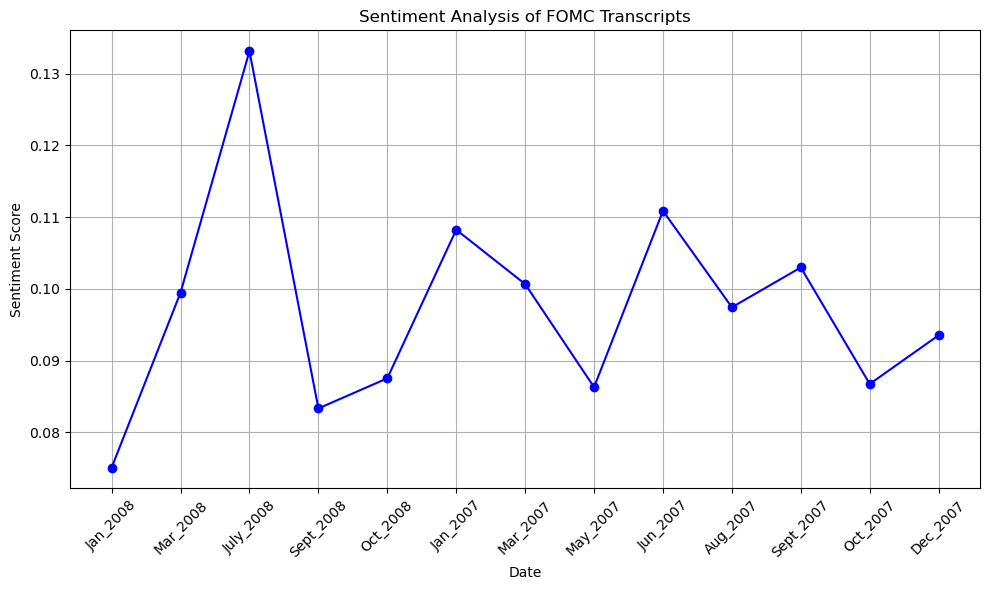

In [83]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to calculate sentiment for each transcript
def calculate_sentiment(transcript):
    blob = TextBlob(transcript)
    # The polarity score ranges from -1 (negative) to +1 (positive)
    return blob.sentiment.polarity

# Calculate sentiment scores for each meeting date
sentiment_scores = {}
for date, transcript in speeches_text1.items():
    sentiment_scores[date] = calculate_sentiment(transcript)

# Calculate the average sentiment score across all dates
average_sentiment = sum(sentiment_scores.values()) / len(sentiment_scores)

# Plotting sentiment scores for each date
dates = list(sentiment_scores.keys())
scores = list(sentiment_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(dates, scores, marker='o', linestyle='-', color='b', label='Sentiment Score')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of FOMC Transcripts')
plt.grid(True)
plt.tight_layout()

# Display average sentiment score
print(f"Average Sentiment Score across all dates: {average_sentiment:.2f}")

# Show the plot
plt.show()
